In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import setp
from mpl_toolkits import mplot3d

## Helper Functions

In [2]:
#Figure Formatting parameters

def fig_formate(fig_x=10.0,fig_y=7.0):
    #plt.rcParams['figure.figsize'] = (20.0, 15.0)
    # plt.rcParams.update({'font.size': 30})
    fig = plt.figure(figsize =(fig_x,fig_y))
    SMALL_SIZE = 15
    MEDIUM_SIZE = 15
    BIGGER_SIZE = 25
    CUSTOM_SIZE = 15
    #plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=CUSTOM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.style.use('fivethirtyeight') #'seaborn-darkgrid',  'fivethirtyeight'
    return fig

In [3]:
#Data Ploting

def PlotData(data,tension,loadAlias,leg,labls,y_ticks,zone=True,steps=1):
    ax = fig.add_axes([0, 0, 1, 1])
    #ax.set_xticklabels(labls)
    bp = ax.boxplot(data)#labels=labls
    plt.legend(leg,loc=1, bbox_to_anchor=(1.2,1))
    q
    #plt.xticks(np.arange(tension))#[0], tension[-1],5))

    
    if zone: 
        plt.title(f'Power Consumption of Main CNV with {tension[0]}%\n Belt Tension for Combinations {loadAlias}.',color='#4390cb')
        plt.xlabel('Zone Combinations',color='#4390cb')
        plt.ylabel('Power Consumption(W)',color='#4390cb')
        
    else:
        plt.title(f'Power Consumption of Main CNV with {tension[0]}% to {tension[-1]}%\n Belt Tension for Combinations {loadAlias}.',color='#4390cb')
        plt.xlabel('Belt Tension in Percentage',color='#4390cb')
        plt.ylabel('Average Power Consumption(W)',color='#4390cb')
            
    plt.show()

In [4]:
def plot_AvgPower(y_ticks,leg,tension,comb,steps=1):
    #for 1pallet combinations
    fig=fig_formate()
    # leg=['0:0000','1:1000','2:0100','4:0010','8:0001',
    #             '3:1100','5:1010','6:0110','9:1001',
    #            '10:0101','12:0011','7:1110','11:1101',
    #             '13:1011','14:0111','15:1111']


    colors = ['b','c' , 'y', 'm', 'r','#ff8000']

    for i in tension:
        j=0
        
        data=customize_DF_reading(df_L, [i], comb)
        for sr in data:   
            if i==70:
                plt.scatter(i,sr.mean(), s=60, color='b')
            
            else:
                plt.scatter(i,sr.mean(), s=60, color=colors[j])

            j=j+1
        #plt.legend(leg)


    #ax = fig.add_axes([0, 0, 1, 1])
    plt.yticks(np.arange(y_ticks[0],y_ticks[1],steps))
    plt.xticks(np.arange(tension[0], 100,5))
    plt.legend(leg,loc=1, bbox_to_anchor=(1.2,1))

    plt.title(f'Average Power Consumption of Main CNV with {tension[0]}% to {tension[-1]}%\n Belt Tension for Combinations {comb}.',color='#4390cb')
    plt.xlabel('Belt Tension in Percentage',color='#4390cb')
    plt.ylabel('Average Power Consumption(W)',color='#4390cb')
    plt.show()

In [5]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

## Customize data Frame Reading
This function takes three arguments and returns a list:
1. data frame
2. beltTension: List or an int (query parameter)
3. loadAlais: list or int (query parameter)

This function returns a list containg a panda series of values of column 'Power (W)' based on respective query parameters

In [6]:

def customize_DF_reading(df, beltTension, loadAlias):
    data=[]
    if (isinstance(beltTension,list) and isinstance(loadAlias,list)):
            for tension in beltTension:
                for load in loadAlias:
                    temp=df.loc[(df['%Belt Tension']==tension) &(df['Load Alias']==load),['Power (W)']]
                    if temp.empty !=True:
                        data.append(temp['Power (W)'])

    return data

# Some Note about CNV data collection:

1. Main coneyor has 4 zones labled as Z1,Z2,Z3,Z5. This CNV can process up to 4 pallets.
2. These zones generates 16 different combinations for pallet(load) processing on main conveyor. Load is varied on CNV according to these combinations
   which helps us to capture the minute effct on power consumed by conveyor motor driver.
3. These Combinations are listed below:

| Combination Number | Combination | Description|
|:--------------------|:-------------|:------------|
|0 | 0000 | No Load
|1 | 1000 | 1 Pallet at Z1
|2 | 0100 | 1 Pallet at Z2
|3 | 1100 | 2 pallets; Z1 and Z2 respectively
|4 | 0010 | 1 Pallet at Z3
|5 | 1010 | 2 pallets; Z1 and Z3 respectively
|6 | 0110 | 2 pallets; Z3 and Z3 respectively
|7 | 1110 | 3 pallets; Z1, Z2 and Z3 respectively
|8 | 0001 | 1 Pallet at Z5
|9 | 1001 | 2 pallets; Z1 and Z5 respectively
|10 | 0101 | 2 pallets; Z2 and Z5 respectively
|11| 1101 | 3 pallets; Z1, Z2 and Z5 respectively
|12| 0011 | 2 pallets; Z3 and Z5 respectively
|13| 1011 | 3 pallets; Z1, Z3 and Z5 respectively
|14| 0111 | 3 pallets; Z2, Z3 and Z5 respectively
|15| 1111 | 4 pallets; Z1, Z2, Z3 and Z5 respectively(Full Load)
    

# for belt tension 0-60%
Here belt tension gradually incresed from 0% to 60%.
Observations:
1. This belt tension range is not suitable for any operation with these belt tension values, there is 
    too much slip in the belt hence there is no motion in the belt.
2. In the box plot of data each box shows the recorded value of power consumed by conveyor driver motor
   for each 15% increment in belt tension respectively.
3. this data is collected for no load condition (Combination 0: 0000)
4. Each box on the plot is plotted for hundred data samples. Each sample is the avarage of five data samples. The samples
   are collected with a sampling interval of 300ms.
5. For belt tension, 0 to 15 percent most of the data is centered about 230W.
6. For belt tension, 45 to 60 percent mostly power consumption data is centred about 233W. There is a 3 point increase in power consumption as comapred to previous belt tensions. 

In [7]:
# for belt tension 0-60%
df_L = pd.read_csv('s_measurements10.csv')
fig=fig_formate()
tension=[0,15,30,45,60]
loadAlias=[0]
data=customize_DF_reading(df_L, tension,loadAlias)

y_ticks=[220, 237]
labls=['0%','15%','30%','45%','60%']
leg=['0%:0000','15%:0000','30%:0000','45%:0000','60%:0000']
zone=False
PlotData(data,tension,loadAlias,leg,labls,y_ticks,zone)


# For belt Tension 70%

## Obervations:

1. With this belt tension,the motor driver head pully is in contact with belt and cnveyor belt starts moving. Only combinations 0 and 1 are used to collect power consumption data for this belt tension. 
2. With no load, belt moves with a moderate slip and mostly data is centered about 237W.
3. As soon as there is a pallet on zone one, speed significantly reduces and a jerky motion is observed in belt and dat is centered about 233W. The effect is similar to belt tensions 45% and 60%. 
4. This belt tension is enough to overcome the frictional forces and put the belt in motion but only under no load condition.
5. this belt tension is not good for pallet processing as with insertion of even 1pallet on conveyor, the friction between belt and conveyor path at the point of contact is much higher and this tension force cannot overcome the frictional force hence belt stops or move with jerks.
6. Dynamic case: Time taken by a pallet to travel from  Z1 to Z5: infinitiy 

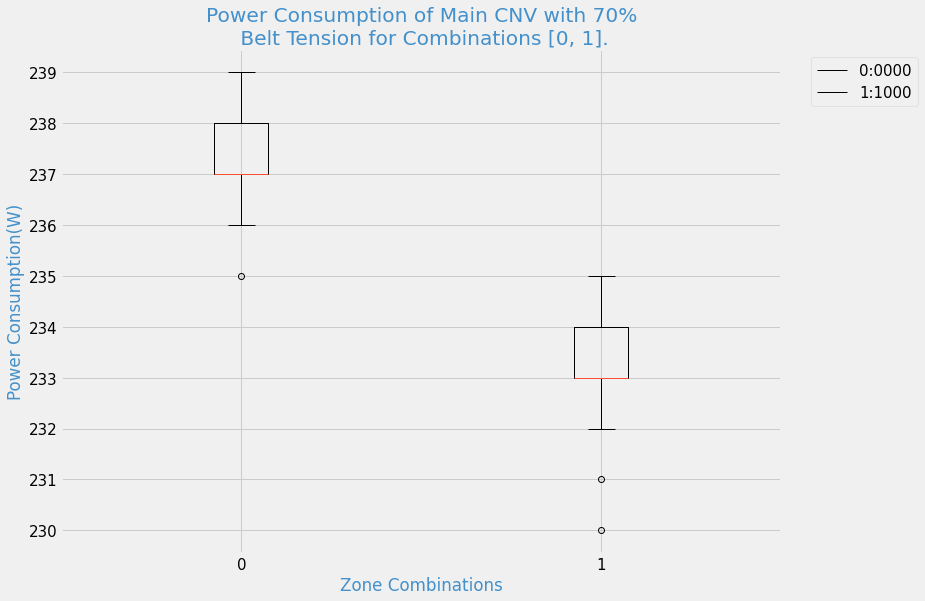

In [8]:
df_L = pd.read_csv('s_measurements10.csv')
fig=fig_formate()
tension=[70]
loadAlias=[0,1]
data=customize_DF_reading(df_L, tension,loadAlias)

y_ticks=[230, 240]
labls=['0','1']
leg=['0:0000','1:1000']
PlotData(data,tension,loadAlias,leg,labls,y_ticks)

# Cumulative Plot for Belt Tension range 0%-70%

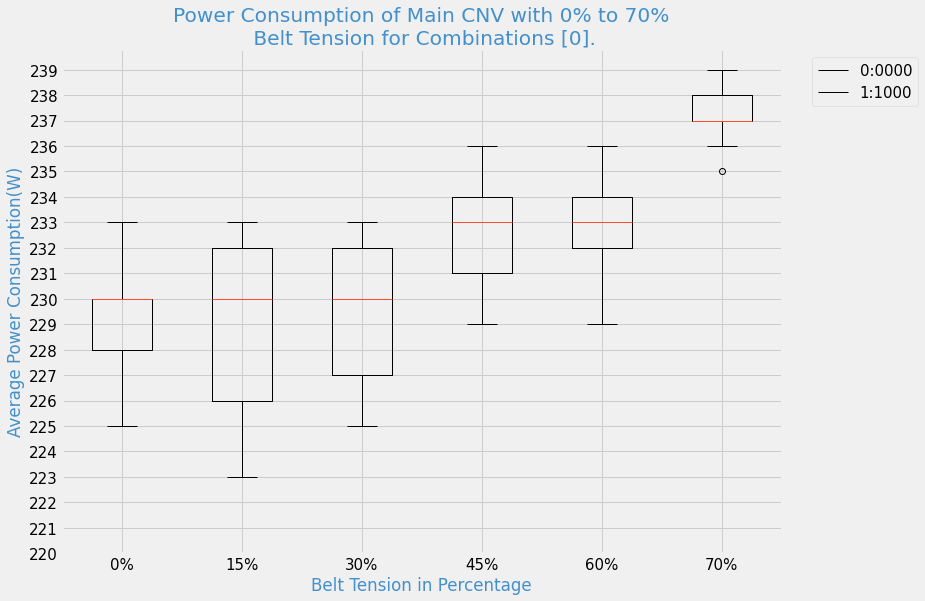

In [9]:
df_L = pd.read_csv('s_measurements10.csv')

fig=fig_formate()
tension=[0,15,30,45,60,70]
loadAlias=[0]
data=customize_DF_reading(df_L, tension,loadAlias)
y_ticks=[220, 240]
labls=['0%','15%','30%','45%','60%','70%']
leg=['0:0000','1:1000']
PlotData(data,tension,loadAlias,leg,labls,y_ticks,False)

# For belt Tension 75%

## Obervations:

1. Relative good and smoother belt motion is observed than 70% belt tension.
2. There is less slip in belt.
3. For this belt tension this experiment is conducted for all load configurations.


## Observations for 0,1,2,4 and 8 Combinations
| Combination Number | Combination | Description|
|:--------------------|:-------------|:------------|
|0 | 0000 | No Load
|1 | 1000 | 1 Pallet at Z1
|2 | 0100 | 1 Pallet at Z2
|4 | 0010 | 1 Pallet at Z3
|8 | 0001 | 1 Pallet at Z5

1. For 0 and 8 combinations the results are very similar and mostly data mean is 239(W). The reason is that in '0' combination we have a no load condition whears for '8' combination we one pallet at zone 5 which is similar to having no load due the fact that at zone 5 almost 75% of pallet reside on next workstation's conveyor.
2. Power consumption for combinations '2 and 4' is similar and the data mean for both combinations is 241. Here the power consumption is higher from other combinations due the fact that pallet is residing either on Zone 2 or Zone 3 due this there is increase in friction and motor supplys more power to overcome that frictional force to maitaine a smooth motion in belt.
3. These combinations does not have any affect on belt slip and speed.

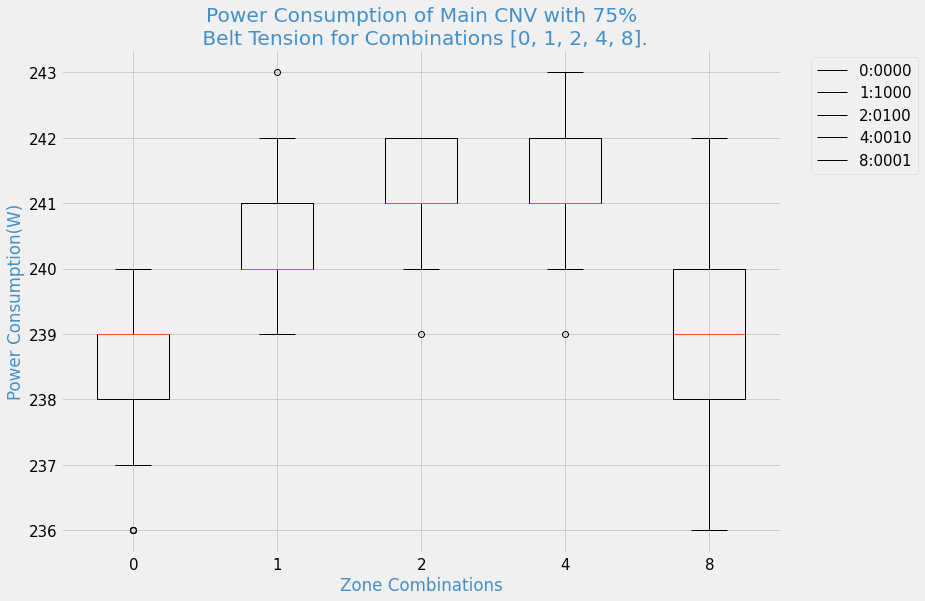

In [10]:
df_L = pd.read_csv('s_measurements10.csv')

fig=fig_formate()
tension=[75]
loadAlias=[0,1,2,4,8]
data=customize_DF_reading(df_L, tension,loadAlias)
y_ticks=[236, 244]
labls=['0','1','2','4','8']
leg=['0:0000','1:1000','2:0100','4:0010','8:0001']
PlotData(data,tension,loadAlias,leg,labls,y_ticks)

# Observations for 3, 5, 6, 9, 10, and 12 Combinations

There combinations co-relates the presence of two pallets at the same time on two different zones of main conveyor.

| Combination Number | Combination | Description|
|:--------------------|:-------------|:------------|
|3 | 1100 | 2 pallets; Z1 and Z2 respectively
|5 | 1010 | 2 pallets; Z1 and Z3 respectively
|6 | 0110 | 2 pallets; Z3 and Z3 respectively
|9 | 1001 | 2 pallets; Z1 and Z5 respectively
|12| 0011 | 2 pallets; Z3 and Z5 respectively

1. For Combinations 3, 6 and 12 a realitively higher power consumption has been observed, also for combinations 3 and 12 data mean is same (245(W)). Though for combinations 3 and 12 the active zones are different but eand result for these combinations depends on zone2 and zone3 respectively.
2. For combinations 9 lowest power has been observed. Here the active zones are 1 and 5 they have very negligibal affects on power consumptions, belt slip and speed.
3. Out of these combinations the most prominent combination is 6, here both zone2 and zone3 are active at the same time and revales some intresting effects. For this combination power consumption slightly increased but friction between belt and contact area significantly increased due which belt speed significantly reduced (apprx.40%). 

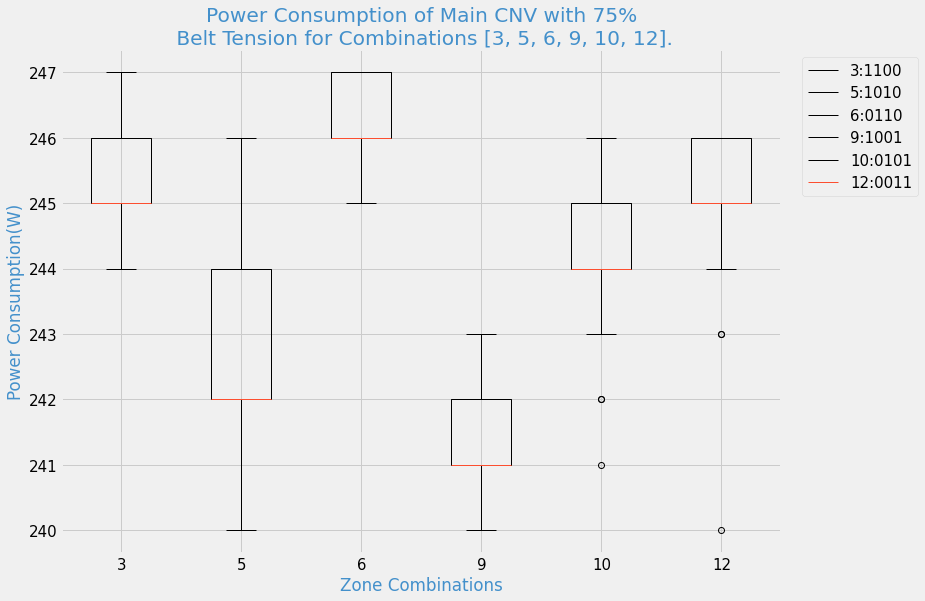

In [11]:
df_L = pd.read_csv('s_measurements10.csv')

fig=fig_formate()
tension=[75]
loadAlias=[3,5,6,9,10,12]
data=customize_DF_reading(df_L, tension,loadAlias)
y_ticks=[240, 248]
labls=['3','5','6','9','10','12']
leg=['3:1100','5:1010','6:0110','9:1001','10:0101','12:0011']
PlotData(data,tension,loadAlias,leg,labls,y_ticks)

# Observations for 7, 11, 13 and 14 Combinations

There combinations co-relates the presence of three pallets at the same time on three different zones of main conveyor. 

| Combination Number | Combination | Description|
|:--------------------|:-------------|:------------|
|7 | 1110 | 3 pallets; Z1, Z2 and Z3 respectively
|11| 1101 | 3 pallets; Z1, Z2 and Z5 respectively
|13| 1011 | 3 pallets; Z1, Z3 and Z5 respectively
|14| 0111 | 3 pallets; Z2, Z3 and Z5 respectively

1. Combination 7 is the most prominent and for this combination the active zones are zone1, zone2 and zone3. As far as conserned with power consumption, it is similar to combination 6(active zones are 2 and 3) but other parameters like slip and speed significantly affects. Belt speed significanlt reduces as compared to other combinations and a jerky motion was observed. Belt slip significantly increased.
2. Combinations 11 and 13 both have same effect on parameters though the active zones are different in both combinations. the active zones for each combination are zone 1,2,5 and zone 1,3,5 respectively. For these combinations belt speed improves, slip decres and jerkey motion vanished and belt moves smoothly. In both combinations zone2 and zone3 affects conveyor parameters and affects from other active zone is neglibial. 
3. combination 14 has similar effect like combination 7

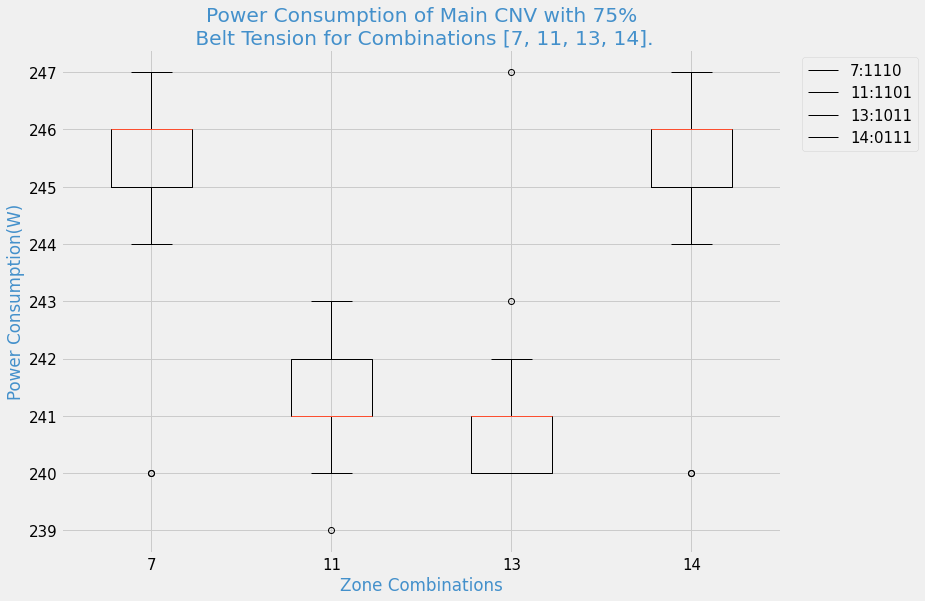

In [12]:
df_L = pd.read_csv('s_measurements10.csv')

fig=fig_formate()
tension=[75]
loadAlias=[7, 11, 13, 14]
data=customize_DF_reading(df_L, tension,loadAlias)
y_ticks=[239, 248]
labls=['7','11','13','14']
leg=['7:1110','11:1101','13:1011','14:0111']
PlotData(data,tension,loadAlias,leg,labls,y_ticks)

# Observation for Combination 15 and Dynamic Case

| Combination Number | Combination | Description|
|:--------------------|:-------------|:------------|
|15| 1111 | 4 pallets; Z1, Z2, Z3 and Z5 respectively(Full Load)

1. All zones are active in this combinations. The power consumption is centered about a mean value of 246(W), similar like combinations 7 and 14 but belt speed significantly decresed and jerky motion started also, belt slip significantly increased.

2. Dynamic Case: It took 5.63 sec for a pallet to move from Zone 1 to Zone 

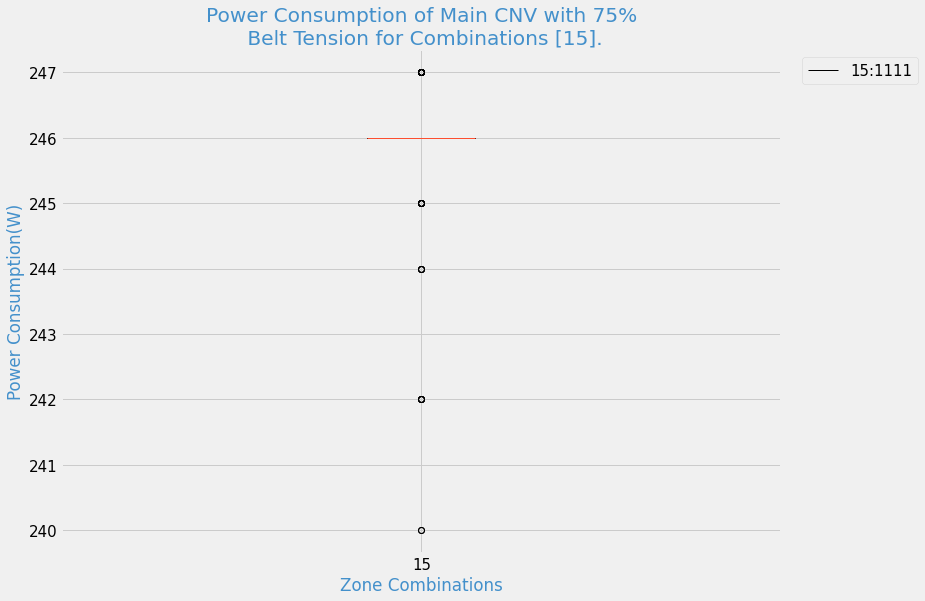

In [13]:

df_L = pd.read_csv('s_measurements10.csv')

fig=fig_formate()
tension=[75]
loadAlias=[15]
data=customize_DF_reading(df_L, tension,loadAlias)
y_ticks=[240, 248]
labls=['15']
leg=['15:1111']
PlotData(data,tension,loadAlias,leg,labls,y_ticks)

# Plot for All Combinations with Belt tension 75%

This Belt tension is relatively good for processing 1 pallet at a time on any zone of conveyor. With the processing of two pallets belt speed reduces and frictional force increases and this belt tension hardly overcome this frictional force. For long run time time this belt tension harms the belt health. For this belt tension the belt power consumption for no load to maximum load is between 238(W) to 246(W). 

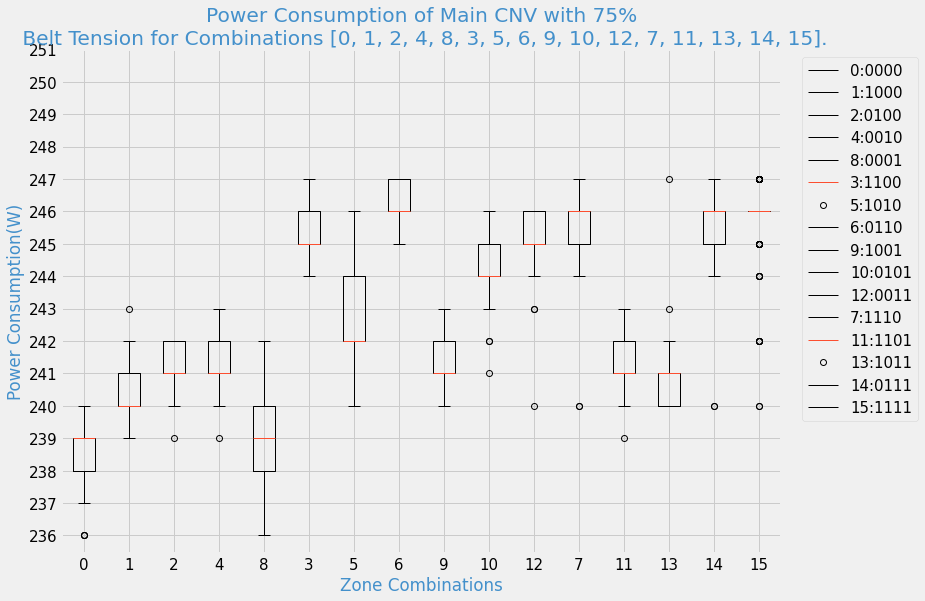

In [14]:
df_L = pd.read_csv('s_measurements10.csv')

fig=fig_formate()
tension=[75]
loadAlias=[0,1,2,4,8,
           3,5,6,9,10,12,
          7,11,13,14,
          15]
data=customize_DF_reading(df_L, tension,loadAlias)
y_ticks=[236, 252]
labls=['0','1','2','4','8',
       '3','5','6','9','10','12',
       '7','11','13','14',
       '15']
leg=['0:0000','1:1000','2:0100','4:0010','8:0001',
    '3:1100','5:1010','6:0110','9:1001','10:0101','12:0011',
    '7:1110','11:1101','13:1011','14:0111',
    '15:1111']
PlotData(data,tension,loadAlias,leg,labls,y_ticks,2)

# Cumulative Plot for Belt Tension range 0%-75%<br> For Combination 0

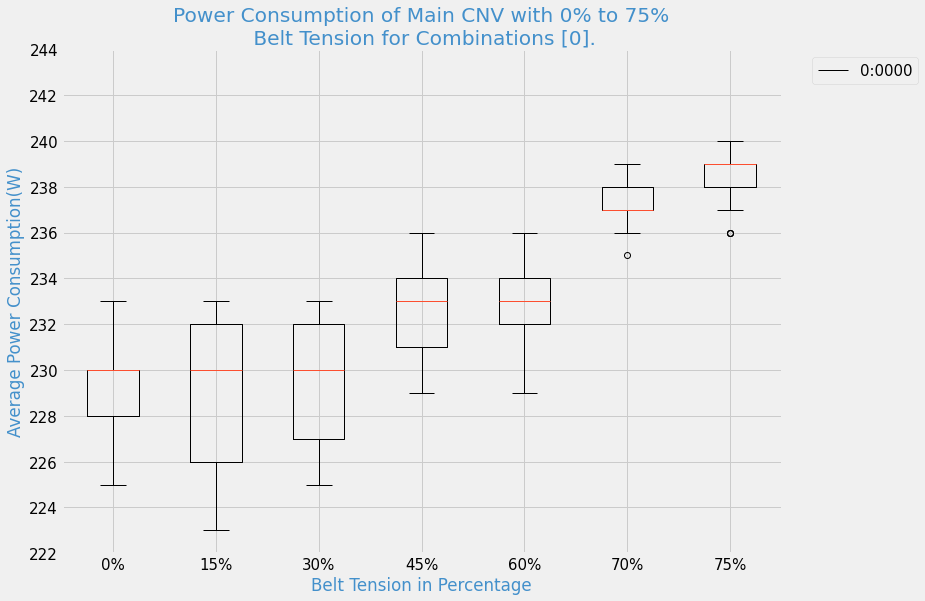

In [15]:


df_L = pd.read_csv('s_measurements10.csv')

fig=fig_formate()
tension=[0,15,30,45,60,70,75]
loadAlias=[0]
data=customize_DF_reading(df_L, tension,loadAlias)
y_ticks=[222,246]
labls=['0%','15%','30%','45%','60%','70%','75%']
leg=['0:0000']
PlotData(data,tension,loadAlias,leg,labls,y_ticks,False,2)

# Cumulative Plot for Combination 1 for Belt tension Range, 70%-75%

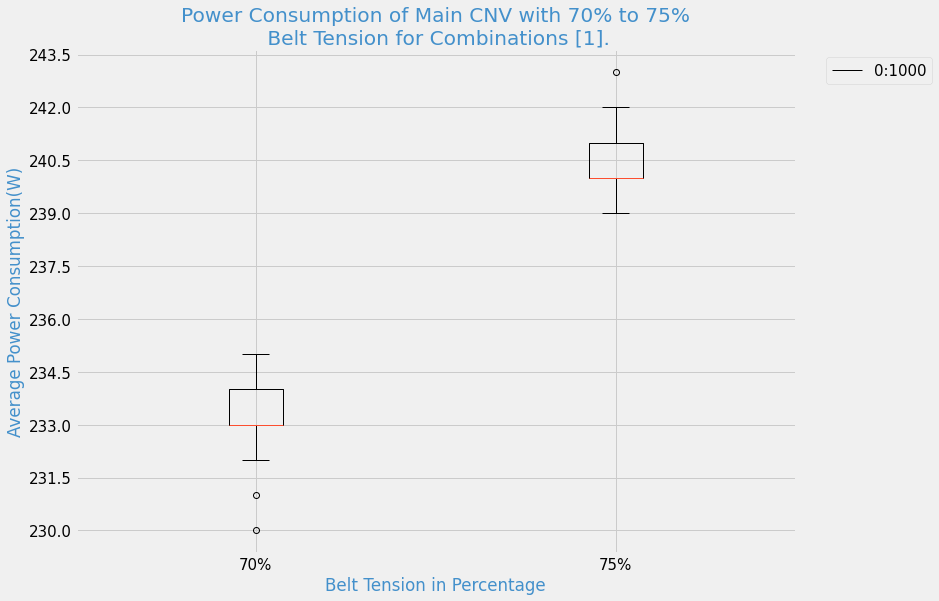

In [16]:
df_L = pd.read_csv('s_measurements10.csv')

fig=fig_formate()
tension=[70,75]
loadAlias=[1]
data=customize_DF_reading(df_L, tension,loadAlias)
y_ticks=[230,245]
labls=['70%','75%']
leg=['0:1000']
PlotData(data,tension,loadAlias,leg,labls,y_ticks,False,1.5)

# For belt Tension 85%

## Obervations:

1. Good and smoother belt motion is observed than 75% belt tension.
2. There is no slip in belt.
3. For this belt tension this experiment is conducted for all load configurations.

## Observations for 0,1,2,4 and 8 Combinations
| Combination Number | Combination | Description|
|:--------------------|:-------------|:------------|
|0 | 1000 | 0 Pallet, No load
|1 | 1000 | 1 Pallet at Z1
|2 | 0100 | 1 Pallet at Z2
|4 | 0010 | 1 Pallet at Z3
|8 | 0001 | 1 Pallet at Z5

1. For theses combinations an overall increase in belt power consumption was observeed and this increase in power consumption is mainly due to increase in belt tension, in this case belt tension is 15% higher than previous case.
2. For 0, 1 and 8 combinations the results are very similar i.e. thess combinations have no significant affect on belt speed and slip but belt power consumption for each combinbation iscreased respectively and out of these three combinations a relativly higher power consumption observed for combination 1.
3. For these combinations the belt slip and belt speed remains uneffected because we have a good belt tension and the presence of pallets on zone a and zone 5 can be neglected as at these zones pallet is not fully residing on conveyor belt of the under experiment workstation.
2. Power consumption for combinations '2 and 4' is similar and the data mean for both combinations is 245. Here the power consumption is higher from other combinations due the fact that pallet is residing either on Zone 2 or Zone 3 due this there is increase in friction and motor supplys more power to overcome that frictional force to maitaine a smooth motion in belt.
3. These combinations does not have any affect on belt slip and speed.

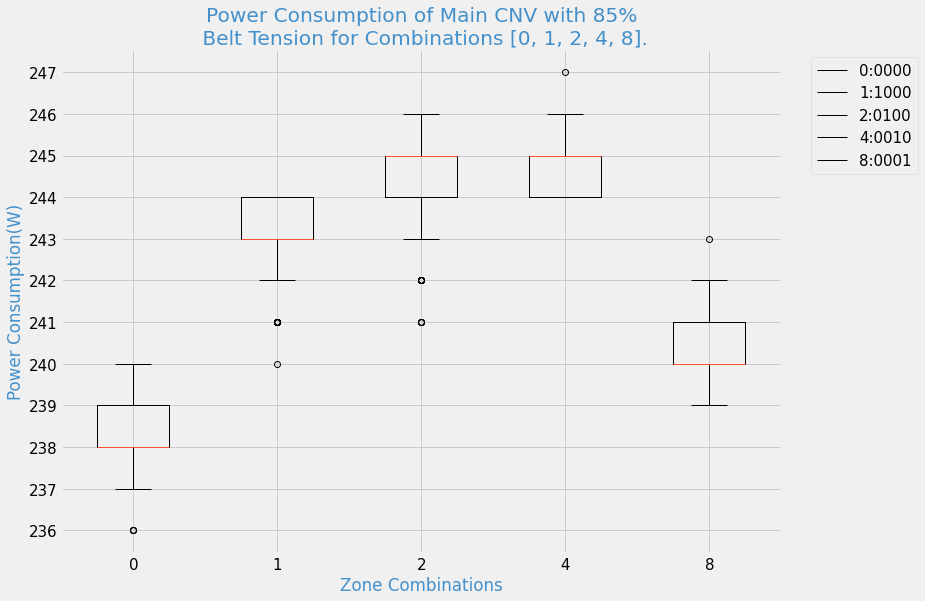

In [17]:
df_L = pd.read_csv('s_measurements10.csv')

fig=fig_formate()
tension=[85]
loadAlias=[0,1,2,4,8]
data=customize_DF_reading(df_L, tension,loadAlias)
y_ticks=[236, 248]
labls=['0','1','2','4','8']
leg=['0:0000','1:1000','2:0100','4:0010','8:0001']
PlotData(data,tension,loadAlias,leg,labls,y_ticks)

# Observations for 3, 5, 6, 9, 10, and 12 Combinations

There combinations co-relates the presence of two pallets at the same time on two different zones of main conveyor.

| Combination Number | Combination | Description|
|:--------------------|:-------------|:------------|
|3 | 1100 | 2 pallets; Z1 and Z2 respectively
|5 | 1010 | 2 pallets; Z1 and Z3 respectively
|6 | 0110 | 2 pallets; Z3 and Z3 respectively
|9 | 1001 | 2 pallets; Z1 and Z5 respectively
|12| 0011 | 2 pallets; Z3 and Z5 respectively

1. Thses combinations have no affect on belt speed and slip as this good enough to overcome the frictional forces to maintain a steady and smooth belt motion.
2. An overall increase in power consumption had been observed for each combination, the maximum power(246W) consumption recorded for combination 6 and a minimum(241W) for combination 12. For these combinations the presence of pallets on different zones have direct affect on belt power consumption.
 

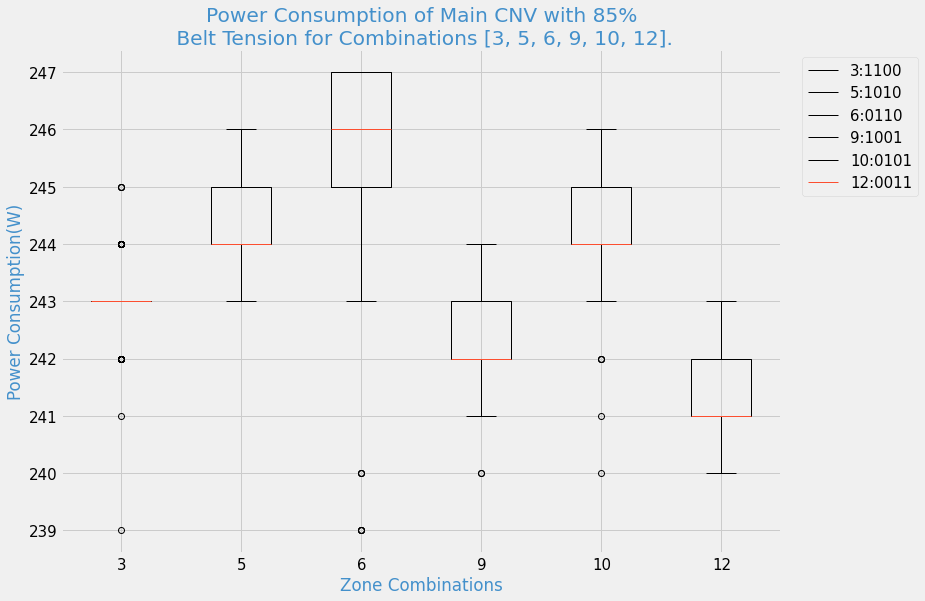

In [18]:
df_L = pd.read_csv('s_measurements10.csv')

fig=fig_formate()
tension=[85]
loadAlias=[3,5,6,9,10,12]
data=customize_DF_reading(df_L, tension,loadAlias)
y_ticks=[239, 248]
labls=['3','5','6','9','10','12']
leg=['3:1100','5:1010','6:0110','9:1001','10:0101','12:0011']
PlotData(data,tension,loadAlias,leg,labls,y_ticks)

# Observations for 7, 11, 13 and 14 Combinations

There combinations co-relates the presence of three pallets at the same time on three different zones of main conveyor.

| Combination Number | Combination | Description|
|:--------------------|:-------------|:------------|
|7 | 1110 | 3 pallets; Z1, Z2 and Z3 respectively
|11| 1101 | 3 pallets; Z1, Z2 and Z5 respectively
|13| 1011 | 3 pallets; Z1, Z3 and Z5 respectively
|14| 0111 | 3 pallets; Z2, Z3 and Z5 respectively

1. Combinations 7 and 14 are the most prominent and for this combination the active zones are zone1, zone2 and zone3 and zone2, zone3 and zone5 respectively. For both combinations the data mean is 248(W).  
2. Combinations 11 and 13 both have same effect on parameters though the active zones are different in both combinations. the active zones for each combination are zone 1,2,5 and zone 1,3,5 respectively.
3. These combinations only affects conveyor belt power consumption and othere parameters liukes belt speed and slip remains same i.e. either no reduction in speed nor increase in slip was observeed 

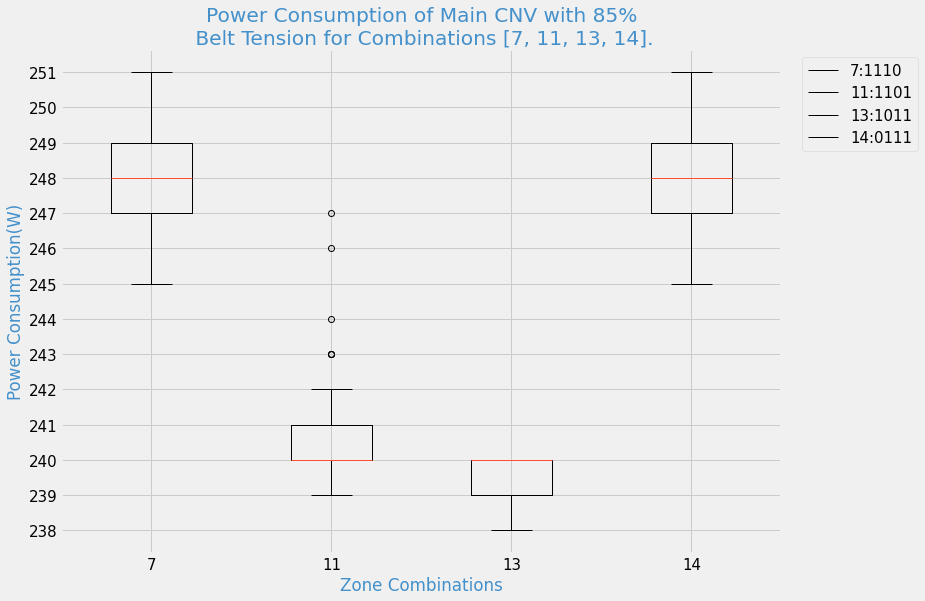

In [19]:
df_L = pd.read_csv('s_measurements10.csv')

fig=fig_formate()
tension=[85]
loadAlias=[7, 11, 13, 14]
data=customize_DF_reading(df_L, tension,loadAlias)
y_ticks=[238, 252]
labls=['7','11','13','14']
leg=['7:1110','11:1101','13:1011','14:0111']
PlotData(data,tension,loadAlias,leg,labls,y_ticks)

# Observation for Combination 15 and Dynamic Case

| Combination Number | Combination | Description|
|:--------------------|:-------------|:------------|
|15| 1111 | 4 pallets; Z1, Z2, Z3 and Z5 respectively(Full Load)

1. All zones are active in this combinations. The power consumption mean is 243(W), similar like combination 3, this is strangecaccording to rule this power value must be similar to power consumption values of combinations 7 and 14. a very little reduction in belt speed was observed.

2. Dynamic Case: It took 5 sec for a pallet to move from Zone 1 to Zone 5.



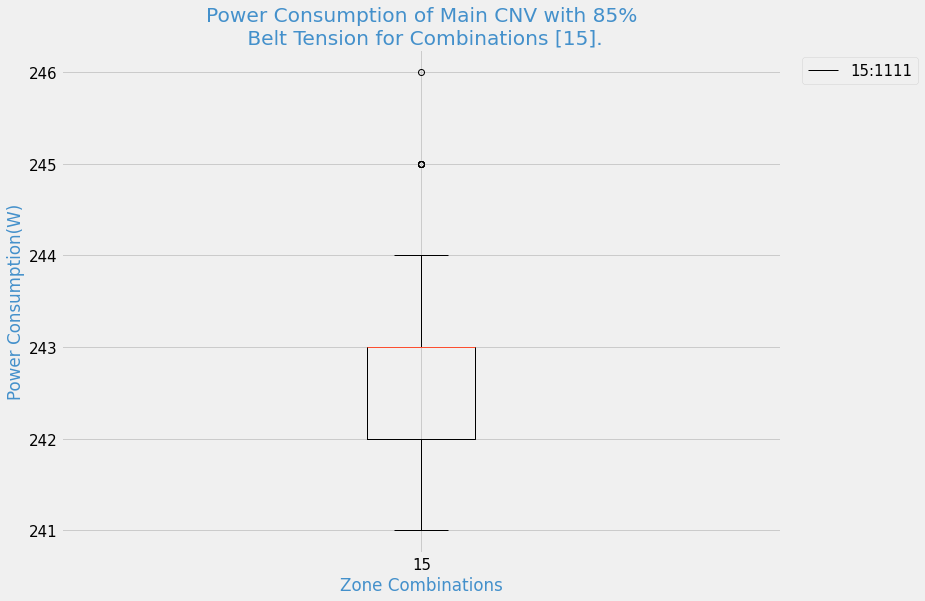

In [20]:
df_L = pd.read_csv('s_measurements10.csv')

fig=fig_formate()
tension=[85]
loadAlias=[15]
data=customize_DF_reading(df_L, tension,loadAlias)
y_ticks=[241, 247]
labls=['15']
leg=['15:1111']
PlotData(data,tension,loadAlias,leg,labls,y_ticks)

# Plot for All Combinations with Belt tension 85%

This Belt tension is relatively good for processing almost any number of pallets at a time on any zone of conveyor. For this belt tension the belt power consumption for no load to maximum load is between 238(W) to 248(W). This can be an optimal belt tension. 

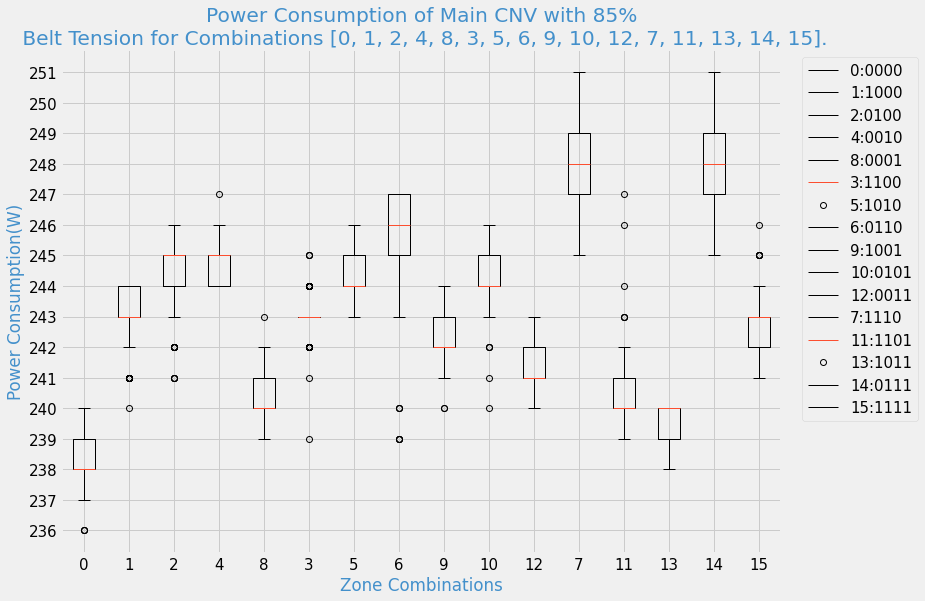

In [21]:
df_L = pd.read_csv('s_measurements10.csv')

fig=fig_formate()
tension=[85]
loadAlias=[0,1,2,4,8,
           3,5,6,9,10,12,
          7,11,13,14,
          15]
data=customize_DF_reading(df_L, tension,loadAlias)
y_ticks=[236, 252]
labls=['0','1','2','4','8',
       '3','5','6','9','10','12',
       '7','11','13','14',
       '15']
leg=['0:0000','1:1000','2:0100','4:0010','8:0001',
    '3:1100','5:1010','6:0110','9:1001','10:0101','12:0011',
    '7:1110','11:1101','13:1011','14:0111',
    '15:1111']
PlotData(data,tension,loadAlias,leg,labls,y_ticks,2)

# Cumulative Plot for Belt Tension range 0%-85%<br> For Combination 0

In [87]:
# df_L = pd.read_csv('s_measurements10.csv')

#fig=fig_formate()
# tension=[75,85,95]#0,15,30,45,60,70,
# loadAlias=[0,1,2,4,8]
# data=customize_DF_reading(df_L, tension,loadAlias)
# labls=['75%','85%','95%']
# y_ticks=[222,248]
# labls=['0%','15%','30%','45%','60%','70%','75%','85%']
# leg=['0:0000']
# PlotData(data,tension,loadAlias,leg,labls,y_ticks,False,1)




# For belt Tension 95%

## Obervations:

1. Good and smoother belt motion is observed.
2. There is no slip in belt.
3. For this belt tension  a significant increase in power consumption observed for all combinations. This is the maximum belt tension in belt which induces and extra load on conveyor motor shaft so motor needs to supply more power to keep the smooth belt motion.
4. For this belt tension this experiment is conducted for all load configurations.

## Observations for 0,1,2,4 and 8 Combinations
| Combination Number | Combination | Description|
|:--------------------|:-------------|:------------|
|1 | 1000 | 1 Pallet at Z1
|2 | 0100 | 1 Pallet at Z2
|4 | 0010 | 1 Pallet at Z3
|8 | 0001 | 1 Pallet at Z5


2. For 0 and 8 combinations the results are very similar and  data mean is 265(W). The reason is that in '0' combination we have a no load condition whears for '8' combination we one pallet at zone 5 which is similar to having no load due the fact that at zone 5 almost 75% of pallet reside on next workstation's conveyor.
2. Power consumption for combinations '2 and 4' is prominent  data mean for both combinations is 268(W) and 267(W) respectively. Here the power consumption is higher from other combinations due the fact that pallet is residing either on Zone 2 or Zone 3 due this there is increase in friction and motor supplys more power to overcome that frictional force to maitaine a smooth motion in belt.
3. These combinations does not have any affect on belt slip and speed.

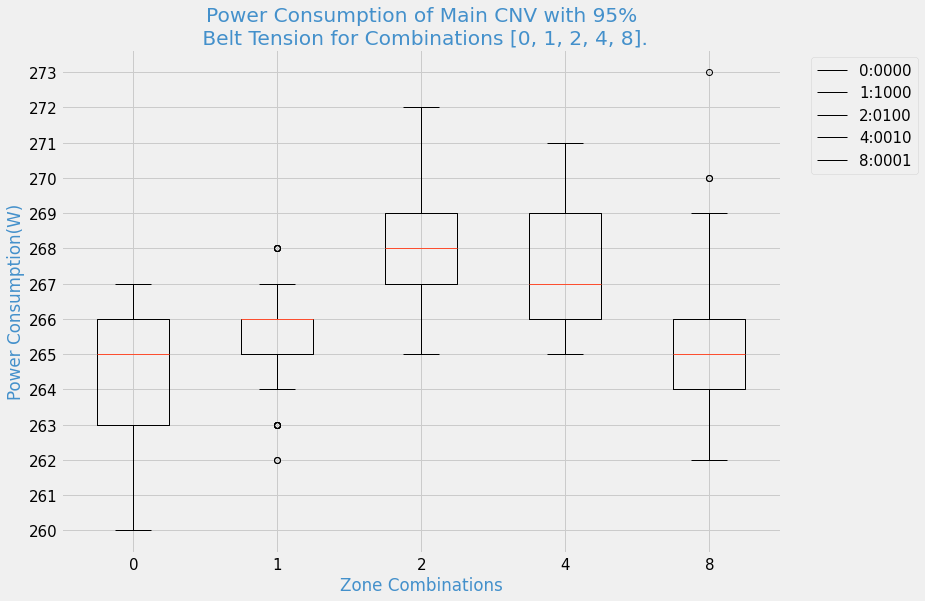

In [23]:
df_L = pd.read_csv('s_measurements10.csv')

fig=fig_formate()
tension=[95]
loadAlias=[0,1,2,4,8]
data=customize_DF_reading(df_L, tension,loadAlias)
y_ticks=[260, 274]
labls=['0','1','2','4','8']
leg=['0:0000','1:1000','2:0100','4:0010','8:0001']
PlotData(data,tension,loadAlias,leg,labls,y_ticks)

# Observations for 3, 5, 6, 9, 10, and 12 Combinations

There combinations co-relates the presence of two pallets at the same time on two different zones of main conveyor.

| Combination Number | Combination | Description|
|:--------------------|:-------------|:------------|
|3 | 1100 | 2 pallets; Z1 and Z2 respectively
|5 | 1010 | 2 pallets; Z1 and Z3 respectively
|6 | 0110 | 2 pallets; Z3 and Z3 respectively
|9 | 1001 | 2 pallets; Z1 and Z5 respectively
|12| 0011 | 2 pallets; Z3 and Z5 respectively

1. For Combinations 3, 5 have similar affects on belt parameters and only belt power consumption is affected. For these combinations a significant increase in belt power consumption had deen observed, it due to pallet load and an extra belt tension. For both combinations the data mean is 273(W). For these combinations the active zones are zone1, zone2 and zone1, zone3 respectively.
2. For combinations 9 lowest power has been observed. Here the active zones are 1 and 5. Both combinations 10 and 12 have same data mean (272(W)) and similar effects like combinations 3 and 5. 
3. Out of these combinations the most prominent combination is 6, here both zone2 and zone3 are active at the same time and revales some intresting effects. For this combination power consumption slightly increased than other combinations.
4. For these combinations there either no reduction in belt speed or no increase in belt slip. 

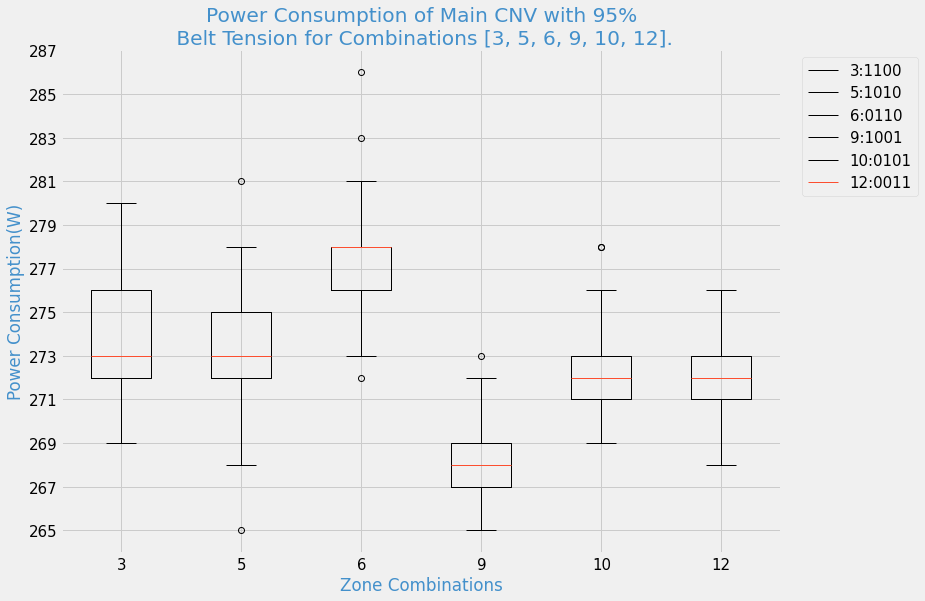

In [24]:
df_L = pd.read_csv('s_measurements10.csv')

fig=fig_formate()
tension=[95]
loadAlias=[3,5,6,9,10,12]
data=customize_DF_reading(df_L, tension,loadAlias)
y_ticks=[265,288]
labls=['3','5','6','9','10','12']
leg=['3:1100','5:1010','6:0110','9:1001','10:0101','12:0011']
PlotData(data,tension,loadAlias,leg,labls,y_ticks,True,2)

# Observations for 7, 11, 13 and 14 Combinations

There combinations co-relates the presence of three pallets at the same time on three different zones of main conveyor.

| Combination Number | Combination | Description|
|:--------------------|:-------------|:------------|
|7 | 1110 | 3 pallets; Z1, Z2 and Z3 respectively
|11| 1101 | 3 pallets; Z1, Z2 and Z5 respectively
|13| 1011 | 3 pallets; Z1, Z3 and Z5 respectively
|14| 0111 | 3 pallets; Z2, Z3 and Z5 respectively

1. Combination 7 is the most prominent and for this combination the active zones are zone1, zone2 and zone3. As far as conserned with power consumption, it is significantly higher to combination 6(active zones are 2 and 3), here the data mean is 280(W) but other parameters like slip and speed are not affected by this combination.
2. Combinations 11 and 13 both only affects conveyor power consumption and remaing parameters remains unaffected, though the active zones are different in both combinations. the active zones for each combination are zone 1,2,5 and zone 1,3,5 respectively.
3. combination 14 has similar effect like combination 7 but has relatively less power consumption. Here the data mean is 277(W).

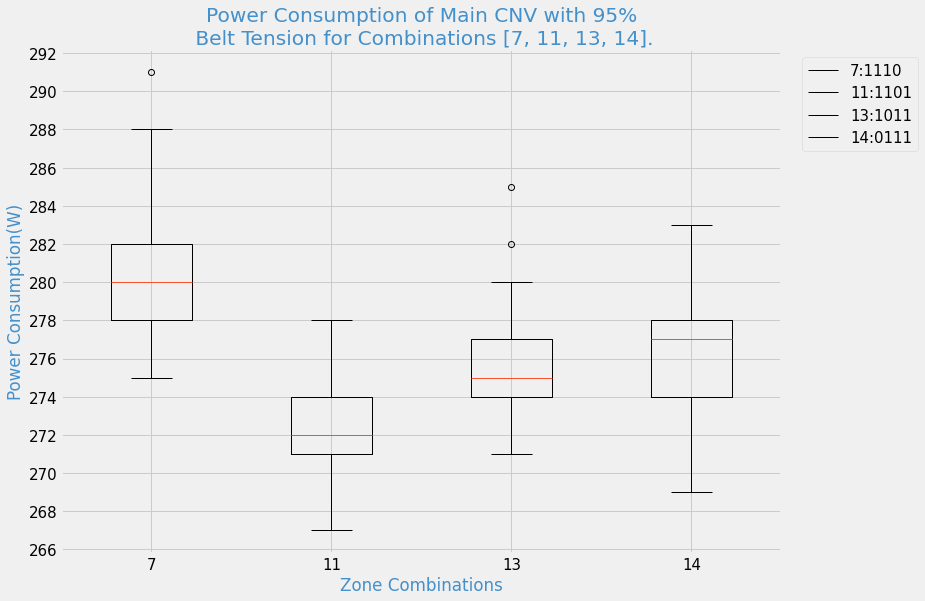

In [25]:
df_L = pd.read_csv('s_measurements10.csv')

fig=fig_formate()
tension=[95]
loadAlias=[7, 11, 13, 14]
data=customize_DF_reading(df_L, tension,loadAlias)
y_ticks=[266,294]
labls=['7','11','13','14']
leg=['7:1110','11:1101','13:1011','14:0111']
PlotData(data,tension,loadAlias,leg,labls,y_ticks,True,2)

# Observation for Combination 15 and Dynamic Case

| Combination Number | Combination | Description|
|:--------------------|:-------------|:------------|
|15| 1111 | 4 pallets; Z1, Z2, Z3 and Z5 respectively(Full Load)

1. All zones are active in this combinations. The power consumption mean is 281(W), slightly higher than combination 7. This combination has similar effects an all other parameters like combination 7.

2. Dynamic Case: It took 4.56 sec for a pallet to move from Zone 1 to Zone 



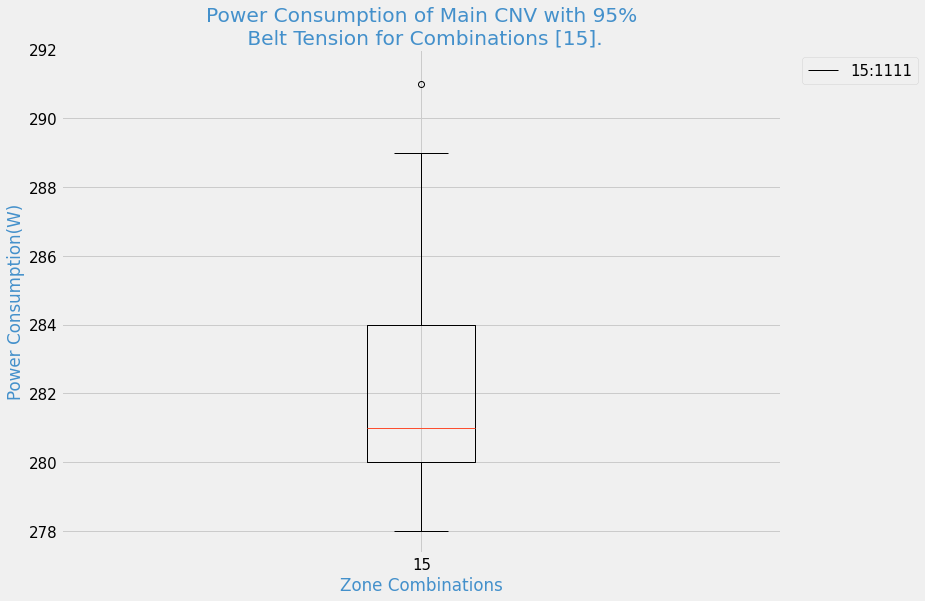

In [26]:
df_L = pd.read_csv('s_measurements10.csv')

fig=fig_formate()
tension=[95]
loadAlias=[15]
data=customize_DF_reading(df_L, tension,loadAlias)
y_ticks=[278,293]
labls=['15']
leg=['15:1111']
PlotData(data,tension,loadAlias,leg,labls,y_ticks,True,2)

# Plot for All Combinations with Belt tension 95%

This Belt tension is not good for processing pallets as this is the maximum belt tension which puts an extra load on motor shaft so conveyor motor driver must supply enough power to maintain a steady motion in the belt hence motor heats up significanlty which can harm conveyor motor driver at any time during a process. We can see that for this belt tension the power consumed by belt for  combination 0 i.e. no load condition is far more than the the power consumed by belt for combination 7 with 85% belt tension. Further more this tension causes the belt break during the process.For this belt tension the belt power consumption for no load to maximum load is between 238(W) to 248(W). This can be an optimal belt tension. 

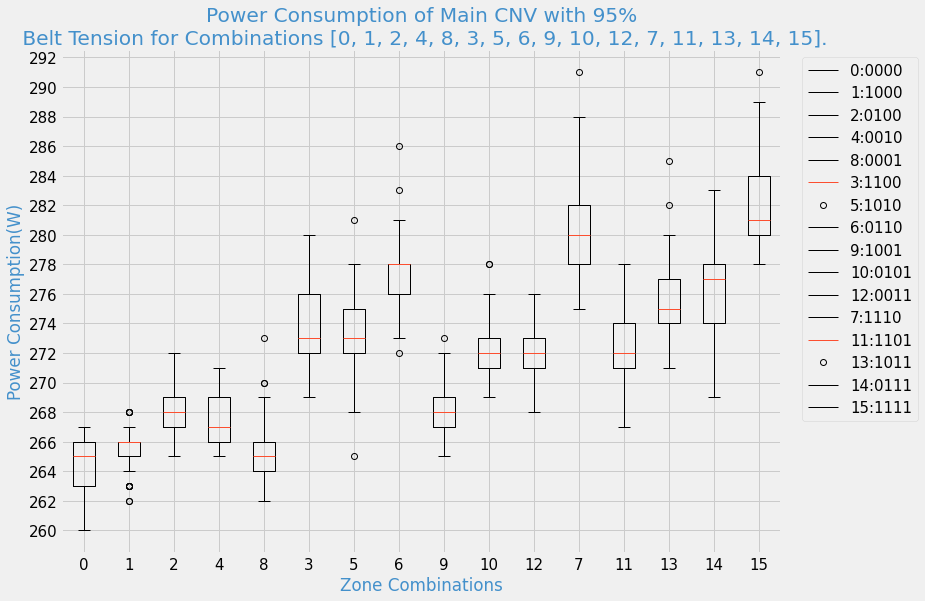

In [27]:
df_L = pd.read_csv('s_measurements10.csv')

fig=fig_formate()
tension=[95]
loadAlias=[0,1,2,4,8,
           3,5,6,9,10,12,
          7,11,13,14,
          15]
data=customize_DF_reading(df_L, tension,loadAlias)
y_ticks=[260, 293]
labls=['0','1','2','4','8',
       '3','5','6','9','10','12',
       '7','11','13','14',
       '15']
leg=['0:0000','1:1000','2:0100','4:0010','8:0001',
    '3:1100','5:1010','6:0110','9:1001','10:0101','12:0011',
    '7:1110','11:1101','13:1011','14:0111',
    '15:1111']
PlotData(data,tension,loadAlias,leg,labls,y_ticks,True,2)

# Average Plot for ALL Combination with Belt tension Range, 0%-95% 

## Average Plot for Combination 0 for Belt tension Range, 0%-95% <br>For No Load(0000)

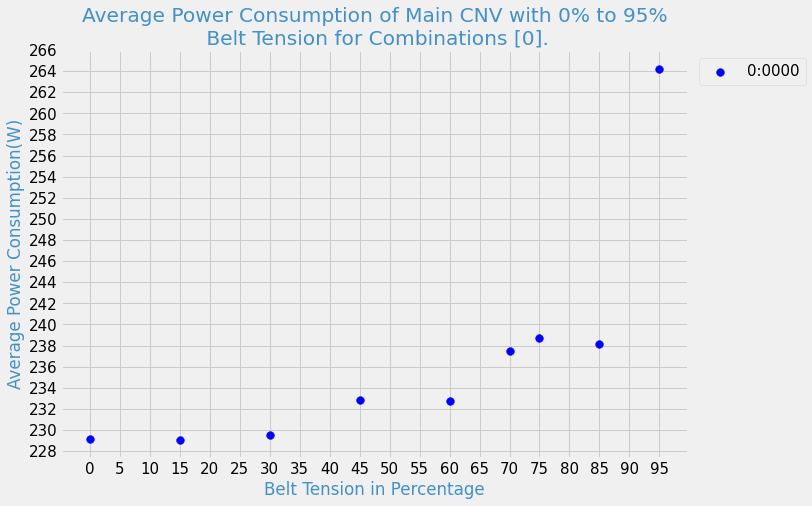

In [28]:
leg=["0:0000"]
plot_AvgPower([228, 268],leg,[0,15,30,45,60,70,75,85,95],[0],2)

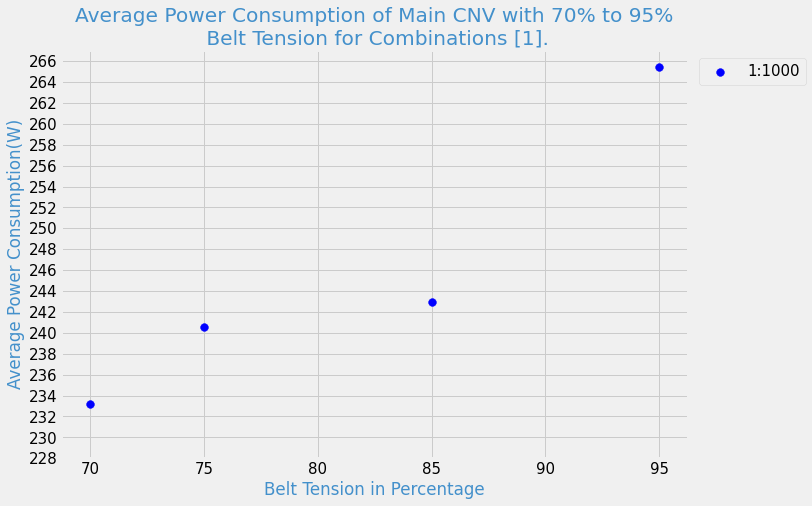

In [29]:
leg=["1:1000"]
plot_AvgPower([228, 268],leg,[70,75,85,95],[1],2)

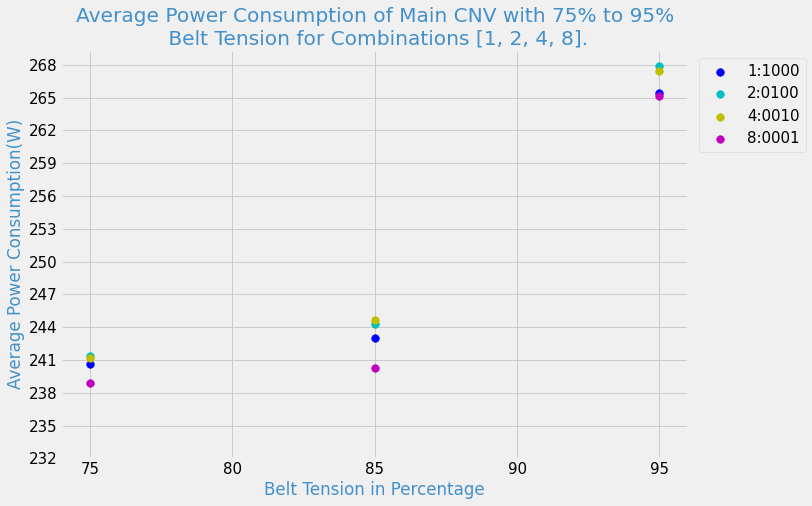

In [30]:
leg=['1:1000','2:0100','4:0010','8:0001']
plot_AvgPower([232, 270],leg,[75,85,95],[1,2,4,8],3)

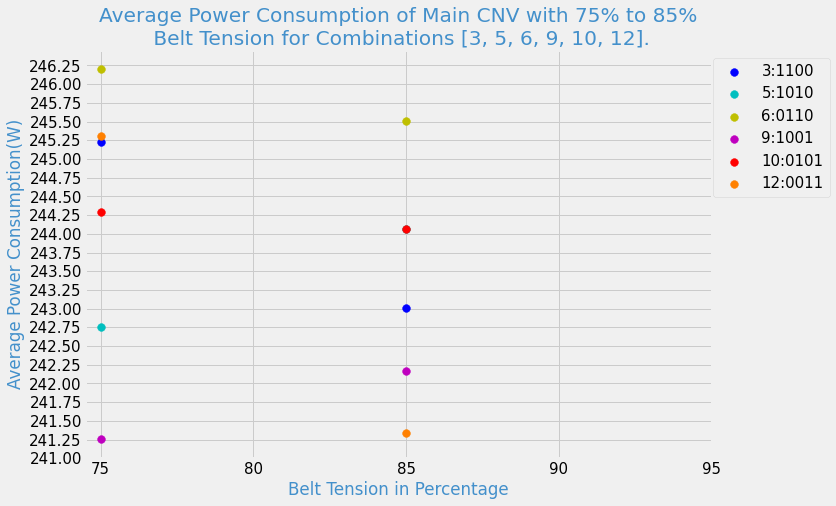

In [31]:
leg=['3:1100','5:1010','6:0110','9:1001', '10:0101','12:0011']
plot_AvgPower([241, 246.5],leg,[75,85],[3,5,6,9,10,12],0.25)

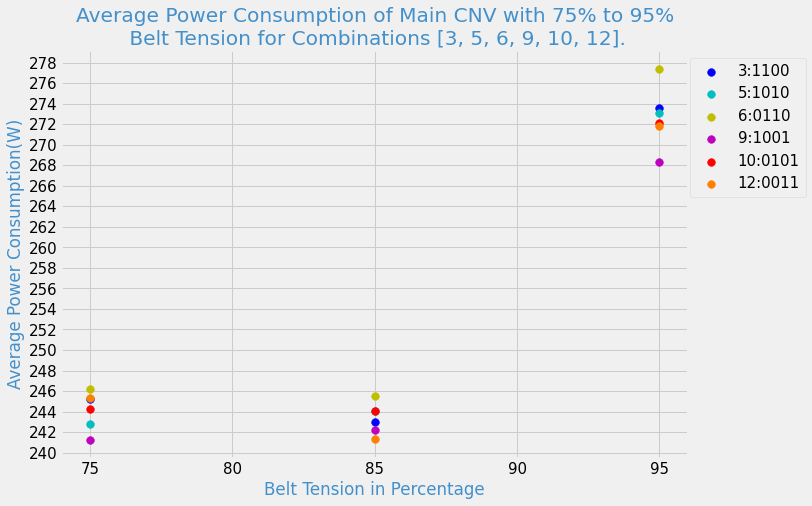

In [32]:
leg=['3:1100','5:1010','6:0110','9:1001', '10:0101','12:0011']
plot_AvgPower([240, 280],leg,[75,85,95],[3,5,6,9,10,12],2)

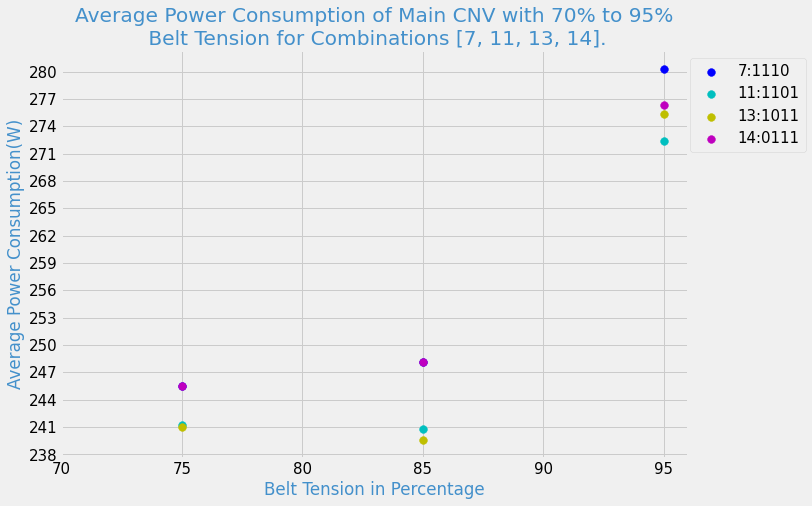

In [33]:
leg=['7:1110','11:1101','13:1011','14:0111']
plot_AvgPower([238, 283],leg,[70,75,85,95],[7,11,13,14],3)

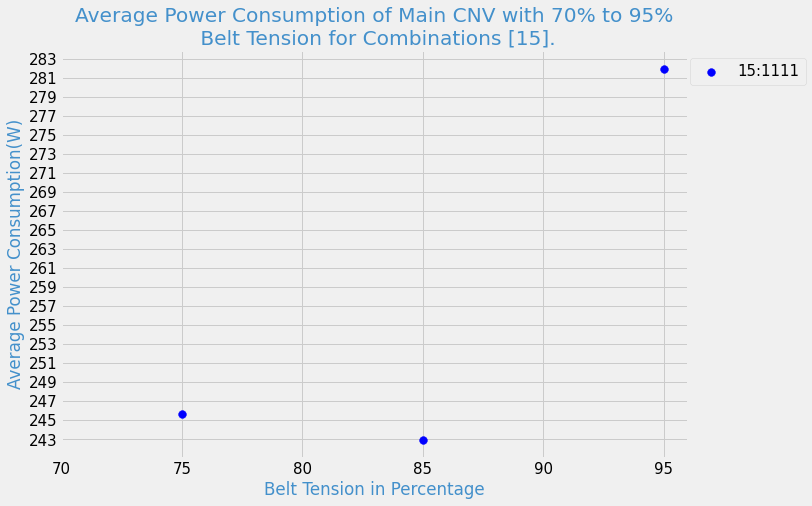

In [34]:
leg=['15:1111']
plot_AvgPower([243, 284],leg,[70,75,85,95],[15],2)

Text(0.5, 0.98, '')

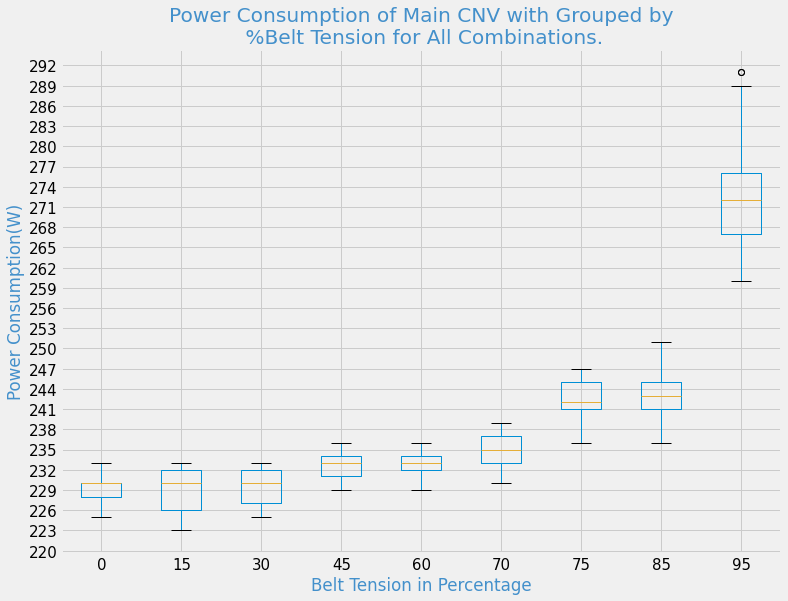

In [25]:
fig=fig_formate()
ax = fig.add_axes([0, 0, 1, 1])
df_L = pd.read_csv('s_measurements10.csv')
df_L.boxplot(column = 'Power (W)', by = '%Belt Tension', fontsize=15,figsize=(10.0,7.0),ax=ax);
plt.title(f'Power Consumption of Main CNV Grouped by\n %Belt Tension for All Combinations.',color='#4390cb')
plt.xlabel('Belt Tension in Percentage',color='#4390cb')
plt.ylabel('Power Consumption(W)',color='#4390cb')
plt.yticks(np.arange(220,295,3))
plt.suptitle('') 

In [62]:

# df_L[filt].boxplot(column='Power (W)',by = '%Belt Tension')
# test.append(df_L.loc[filt,'Power (W)'])
# df_L.boxplot(column = 'Power (W)', by = '%Belt Tension', fontsize=15,figsize=(10.0,7.0),ax=ax);
    
# # filt=((df_L['%Belt Tension']==75) & (df_L['Load Alias'].isin(la)))
# # # data[data['Year'] == '2009-10'].boxplot(column='Score')

# # print(df_L['Load Alias'].isin(la))
# type(df_L.groupby(['Load Alias','%Belt Tension']))#.filter(((df_L['%Belt Tension']==75) & (df_L['Load Alias'].isin(la))))


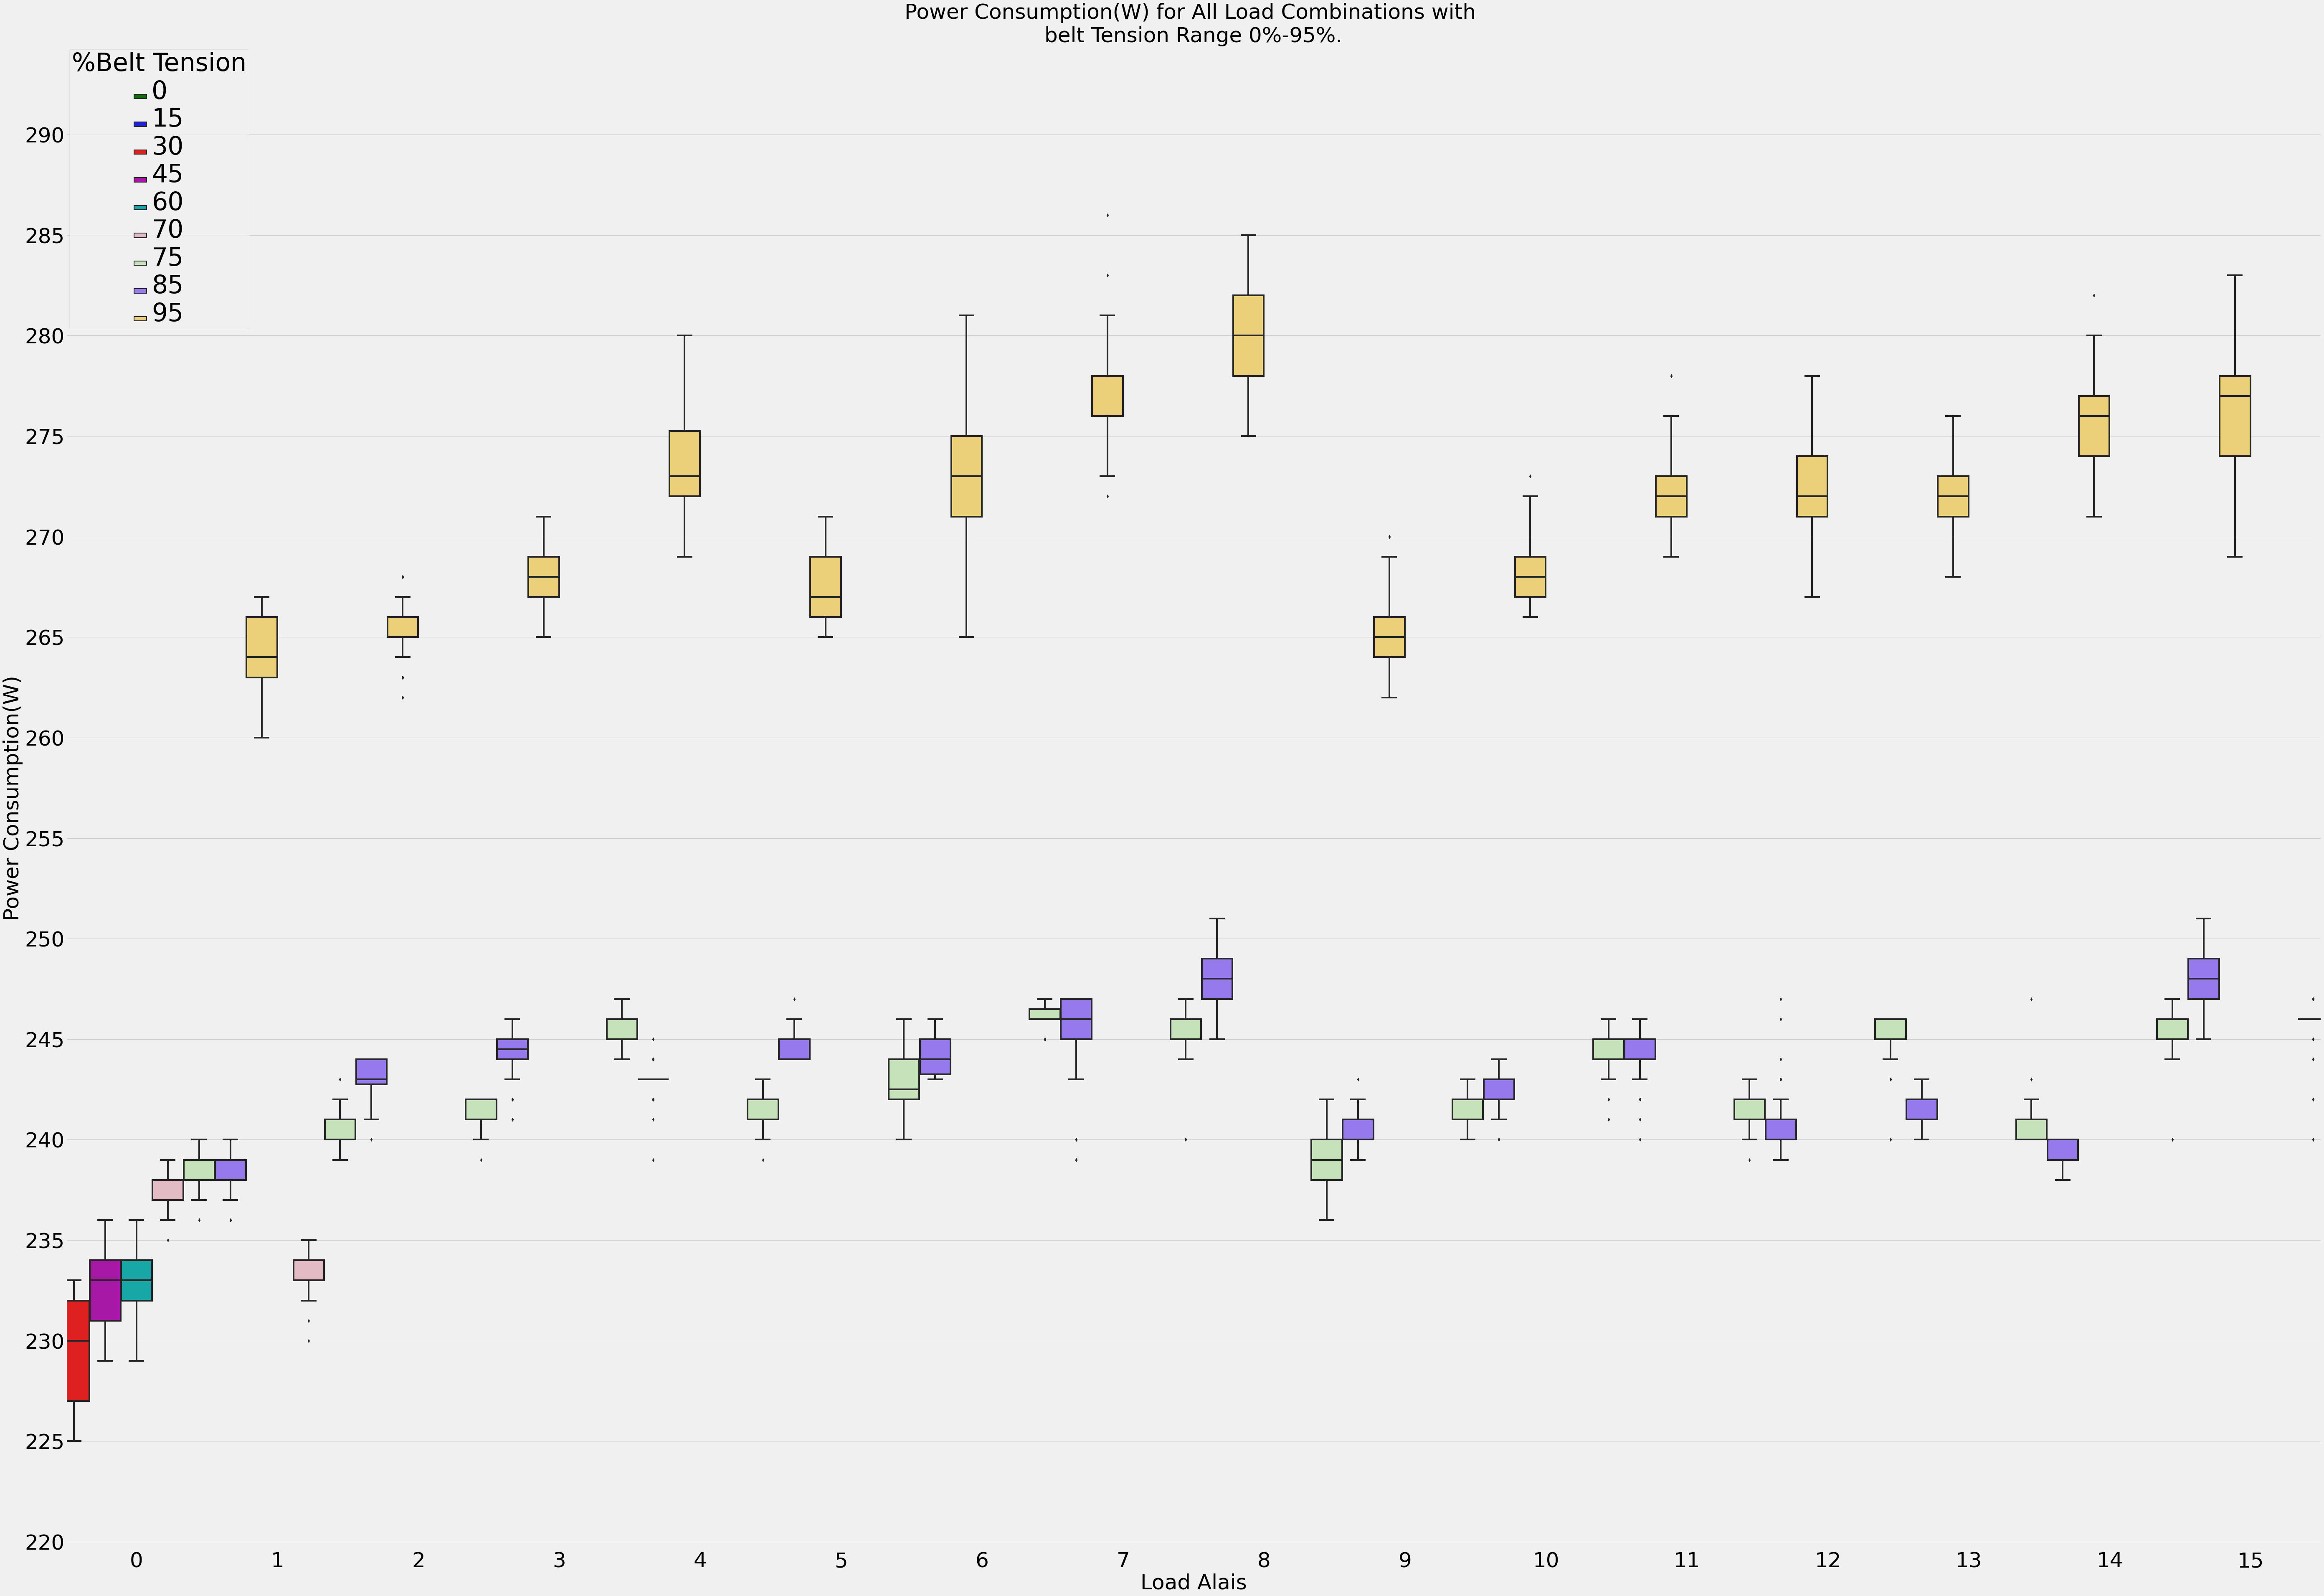

In [147]:
import seaborn as sns
la=[0,1,2,4,8]
fig=fig_formate(75.0,50.0)

ax = fig.add_axes([0, 0, 1, 1])
plt.yticks(np.arange(220,300,5))
# for i in [75,85,95]:
#     filt=((df_L['%Belt Tension']==i) & (df_L['Load Alias'].isin(la)))
#     df=df_L[filt]
#     sns.boxplot(y=df['Power (W)'], x=df['Load Alias'],#df['%Belt Tension'], 
#                      data=df,
#                      hue=df['Load Alias'],
#                palette = 'husl')
my_pal = {0: "g", 15: "b", 30:"r", 45:"m", 60:"c", 70:"#e8b5c2",75:"#c2e8b5", 85:"#8c66ff", 95:"#ffd966"}
b=sns.boxplot(y=df_L['Power (W)'], x=df_L['Load Alias'],#df['%Belt Tension'], 
                 data=df_L,
                 hue=df_L['%Belt Tension'],
           #palette = 'husl',
             palette=my_pal,
             showfliers=True,
             width=2)
b.set_xlabel("Load Alais",fontsize=50)
b.set_ylabel("Power Consumption(W)",fontsize=50)
b.set_title("Power Consumption(W) for All Load Combinations with \nbelt Tension Range 0%-95%.",fontsize=50)
plt.setp(ax.get_legend().get_texts(), fontsize='60') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='60') # for legend title
# b.set_yticklabels(b.get_yticks(), size = 50)
# b.set_xticklabels(b.get_xticks(), size = 50)
b.tick_params(labelsize=50)

In [125]:
# loadAlias=[0,1,2,4,8]
# tension= [75,85,95]
# fig=fig_formate(15.0,10.0)
# ax = fig.add_axes([0, 0, 1, 1])
# plt.yticks(np.arange(220,280,3))
# data=customize_DF_reading(df_L, tension,loadAlias)
# sns.boxplot(y='Power (W)', x='%Belt Tension', 
#                  data=data,
#                  hue='Load Alias')

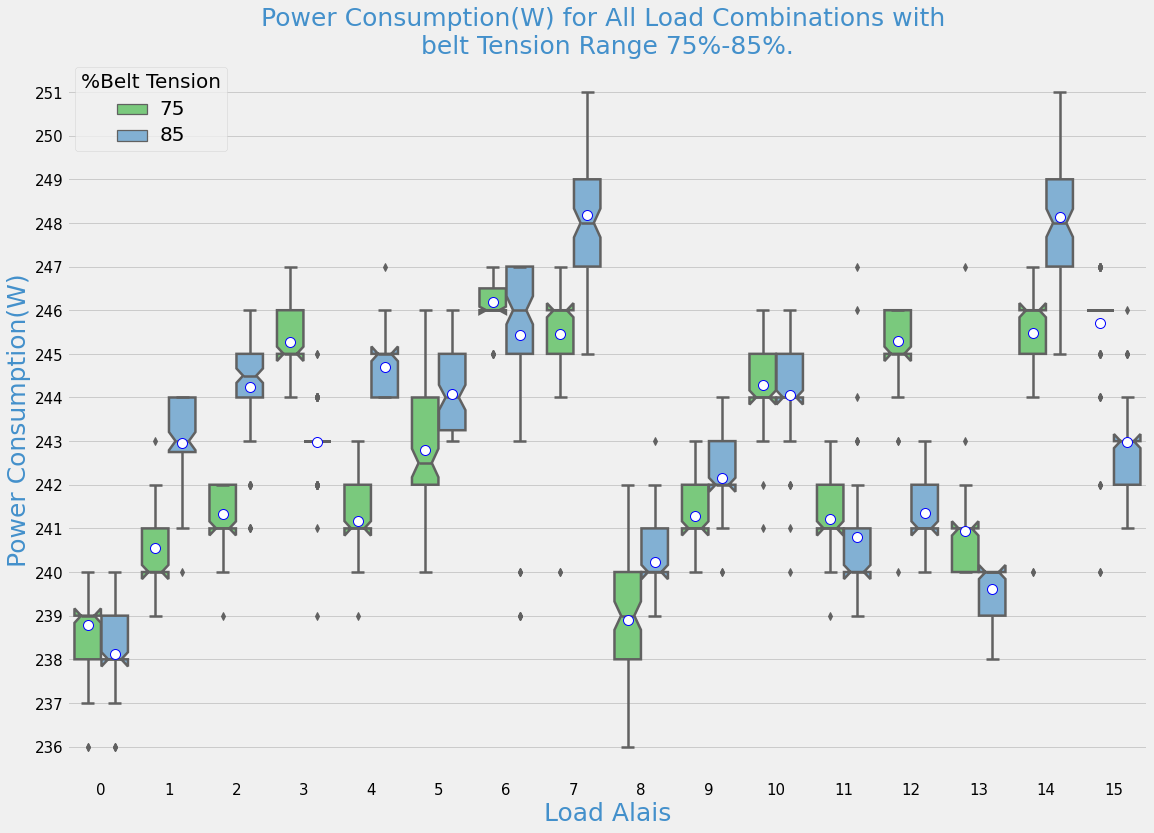

In [134]:
import seaborn as sns
la=[0,1,2,4,8]
fig=fig_formate(15.0,10.0)

ax = fig.add_axes([0, 0, 1, 1])
plt.yticks(np.arange(234,260,1))

df_75 = df_L.loc[df_L['%Belt Tension']==75]
df_85 = df_L.loc[df_L['%Belt Tension']==85]
df_concat = pd.concat((df_75, df_85))

my_pal = {75: "#6dd671", 85: "#75b2e0"}
b=sns.boxplot(y=df_concat['Power (W)'], x=df_concat['Load Alias'],#df['%Belt Tension'], 
                 data=df_concat,
                 hue=df_concat['%Belt Tension'],
           #palette = 'husl',
             palette=my_pal,
             showfliers=True,
             linewidth=2.5,
            notch=True,
            showmeans=True,
             meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"blue","markersize":"10"})
b.set_xlabel("Load Alais",fontsize=25,color='#4390cb')
b.set_ylabel("Power Consumption(W)",fontsize=25,color='#4390cb')
b.set_title("Power Consumption(W) for All Load Combinations with \nbelt Tension Range 75%-85%.",fontsize=25,color='#4390cb')
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
b.set_yticklabels(b.get_yticks(), size = 20)
b.set_xticklabels(b.get_xticks(), size = 20)
b.tick_params(labelsize=15)

ax = b.axes
# lines = b.get_lines()
# categories = ax.get_xticks()
# for cat in categories:
#     # every 4th line at the interval of 6 is median line
#     # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
#     y = round(lines[4+cat*6].get_ydata()[0],1) 

#     ax.text(
#         cat, 
#         y, 
#         f'{y}', 
#         ha='center', 
#         va='center', 
#         fontweight='bold', 
#         size=10,
#         color='white',
#         bbox=dict(facecolor='#445A64'))
# leg=['0:0000','1:1000','2:0100','4:0010','8:0001',
#     '3:1100','5:1010','6:0110','9:1001','10:0101','12:0011',
#     '7:1110','11:1101','13:1011','14:0111',
#     '15:1111']
# b.legend(title="Zone Combinations", labels=leg)
# leg=['0:0000','1:1000','2:0100','4:0010','8:0001',
#     '3:1100','5:1010','6:0110','9:1001','10:0101','12:0011',
#     '7:1110','11:1101','13:1011','14:0111',
#     '15:1111']
# # b.legend(title="Zone Combinations", labels=leg)
# n = 0
# for i in leg:
#     b.legend_.texts[n].set_text(i)
#     n += 1

# plt.show()



In [11]:
# fig=fig_formate()
# ax = fig.add_axes([0, 0, 1, 1])
# df_L = pd.read_csv('s_measurements10.csv')
# df_L.boxplot(column = 'Power (W)', by = ['%Belt Tension','Load Alias'], fontsize=15,figsize=(10.0,7.0),ax=ax);
# #plt.title(f'Power Consumption of Main CNV with Grouped by\n %Belt Tension for All Combinations.',color='#4390cb')
# #plt.xlabel('Belt Tension in Percentage',color='#4390cb')
# plt.ylabel('Power Consumption(W)',color='#4390cb')
# plt.yticks(np.arange(220,295,5))
# #plt.suptitle('') 


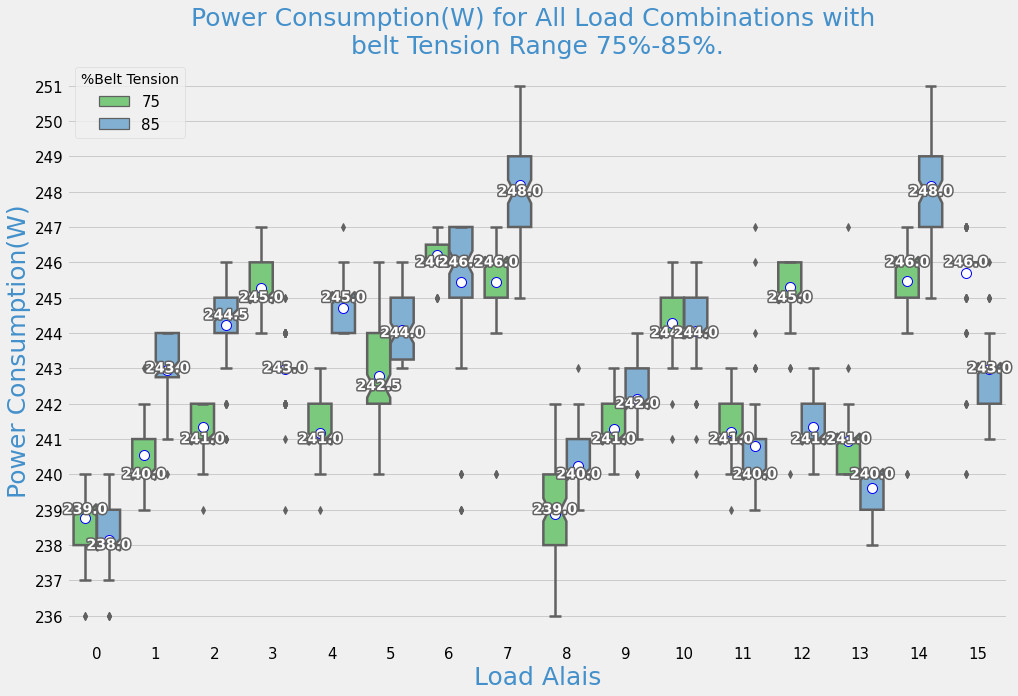

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

fig=fig_formate(15.0,10.0)
plt.yticks(np.arange(234,260,1))

def add_median_labels(ax):
    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1]-median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:.1f}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])


        
df_75 = df_L.loc[df_L['%Belt Tension']==75]
df_85 = df_L.loc[df_L['%Belt Tension']==85]
df_concat = pd.concat((df_75, df_85))

my_pal = {75: "#6dd671", 85: "#75b2e0"}
box_plot=sns.boxplot(y=df_concat['Power (W)'], x=df_concat['Load Alias'],#df['%Belt Tension'], 
                 data=df_concat,
                 hue=df_concat['%Belt Tension'],
           #palette = 'husl',
             palette=my_pal,
             showfliers=True,
             linewidth=2.5,
            notch=True,
            showmeans=True,
             meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"blue","markersize":"10"})
box_plot.set_xlabel("Load Alais",fontsize=25,color='#4390cb')
box_plot.set_ylabel("Power Consumption(W)",fontsize=25,color='#4390cb')
box_plot.set_title("Power Consumption(W) for All Load Combinations with \nbelt Tension Range 75%-85%.",fontsize=25,color='#4390cb')
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
box_plot.set_yticklabels(b.get_yticks(), size = 20)
box_plot.set_xticklabels(b.get_xticks(), size = 20)
box_plot.tick_params(labelsize=15)        
#box_plot = sns.boxplot(x="day", y="total_bill", data=tips, showfliers=False, hue="sex")
add_median_labels(box_plot.axes)
plt.show()

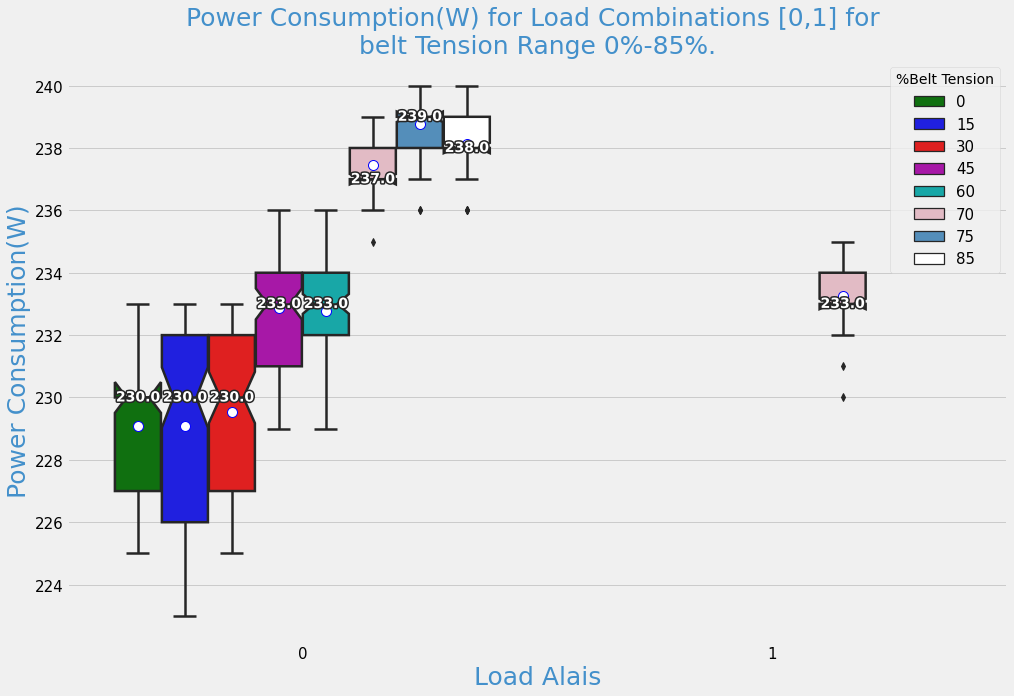

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

fig=fig_formate(15.0,10.0)
plt.yticks(np.arange(210,246,2))

def add_median_labels(ax):
    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1]-median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:.1f}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])


        
df_0 = df_L.loc[df_L['%Belt Tension']==0]
df_15 = df_L.loc[df_L['%Belt Tension']==15]
df_30 = df_L.loc[df_L['%Belt Tension']==30]
df_45 = df_L.loc[df_L['%Belt Tension']==45]
df_60 = df_L.loc[df_L['%Belt Tension']==60]
df_70 = df_L.loc[df_L['%Belt Tension']==70]
df_75 = df_L.loc[(df_L['%Belt Tension']==75) & (df_L['Load Alias']==0)] 
df_85 = df_L.loc[(df_L['%Belt Tension']==85) & (df_L['Load Alias']==0)] 

df_concat = pd.concat((df_0, df_15,df_30,df_45,df_60,df_70,df_75,df_85))

my_pal = {0: "g", 15: "b", 30:"r", 45:"m", 60:"c", 70:"#e8b5c2",75:'#4390cb',85:'w'}
box_plot=sns.boxplot(y=df_concat['Power (W)'], x=df_concat['Load Alias'],#df['%Belt Tension'], 
                 data=df_concat,
                 hue=df_concat['%Belt Tension'],
           #palette = 'husl',
             palette=my_pal,
             showfliers=True,
             linewidth=2.5,
            notch=True,
            showmeans=True,
             meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"blue","markersize":"10"})
box_plot.set_xlabel("Load Alais",fontsize=25,color='#4390cb')
box_plot.set_ylabel("Power Consumption(W)",fontsize=25,color='#4390cb')
box_plot.set_title("Power Consumption(W) for Load Combinations [0,1] for \nbelt Tension Range 0%-85%.",fontsize=25,color='#4390cb')
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
# box_plot.set_yticklabels(b.get_yticks(), size = 20)
# box_plot.set_xticklabels(b.get_xticks(), size = 20)
box_plot.tick_params(labelsize=15)        
#box_plot = sns.boxplot(x="day", y="total_bill", data=tips, showfliers=False, hue="sex")
add_median_labels(box_plot.axes)
plt.show()

In [97]:
## Mislable clases in Class_4

for i in range(1,11):
    dd=pd.read_csv(f'./Model_4_itr/pred4_{i}.csv')
    filt=dd['Class_4'] != dd['Pred_BT_Class']
    print(f'{i}---{len(dd[filt])}')
    display(dd[filt])

1---15


,Load Alias,Power (W),%Belt Tension,Class_4,Pred_BT_Class
6,8,240,85,3,2
7,6,246,85,3,2
9,2,242,75,2,3
11,8,240,85,3,2
25,13,242,75,2,3
29,0,239,85,3,2
30,11,241,75,2,3
35,3,245,75,2,3
43,3,245,75,2,3
56,2,242,75,2,3


2---6


,Load Alias,Power (W),%Belt Tension,Class_4,Pred_BT_Class
4,8,241,85,3,2
13,2,242,75,2,3
14,3,245,75,2,3
41,7,246,85,3,2
54,7,246,85,3,2
59,7,244,75,2,3


3---29


,Load Alias,Power (W),%Belt Tension,Class_4,Pred_BT_Class
2,7,246,85,3,2
12,8,240,85,3,2
25,14,247,85,3,2
26,14,246,85,3,2
32,13,247,75,2,3
33,6,246,85,3,2
34,14,247,85,3,2
39,13,241,75,2,3
47,9,242,85,3,2
49,13,242,75,2,3


4---16


,Load Alias,Power (W),%Belt Tension,Class_4,Pred_BT_Class
2,6,246,85,3,2
9,9,241,85,3,2
10,4,243,75,2,3
24,2,242,75,2,3
29,10,244,85,3,2
42,4,245,85,3,2
45,6,247,75,2,3
58,8,240,85,3,2
60,7,246,85,3,2
64,6,246,85,3,2


5---23


,Load Alias,Power (W),%Belt Tension,Class_4,Pred_BT_Class
2,11,241,75,2,3
5,10,246,85,3,2
8,6,246,85,3,2
9,7,246,85,3,2
27,13,241,75,2,3
30,8,240,85,3,2
32,4,246,85,3,2
33,2,242,85,3,2
34,13,240,75,2,3
35,13,241,75,2,3


6---16


,Load Alias,Power (W),%Belt Tension,Class_4,Pred_BT_Class
1,0,238,85,3,1
19,8,241,85,3,2
28,8,241,85,3,2
32,10,245,85,3,2
37,10,245,85,3,2
38,6,246,85,3,2
42,14,246,85,3,2
46,9,241,85,3,2
49,15,245,85,3,2
61,13,242,75,2,3


7---16


,Load Alias,Power (W),%Belt Tension,Class_4,Pred_BT_Class
8,8,240,85,3,2
19,7,246,85,3,2
25,11,241,75,2,3
29,0,238,85,3,1
54,11,241,75,2,3
55,8,241,85,3,2
58,7,246,85,3,2
73,13,242,75,2,3
78,13,241,75,2,3
79,7,245,75,2,3


8---16


,Load Alias,Power (W),%Belt Tension,Class_4,Pred_BT_Class
5,13,242,75,2,3
7,8,240,85,3,2
19,11,241,75,2,3
29,13,241,75,2,3
43,10,246,85,3,2
52,13,241,75,2,3
54,9,242,85,3,2
55,8,241,85,3,2
58,7,246,85,3,2
59,13,240,75,2,3


9---20


,Load Alias,Power (W),%Belt Tension,Class_4,Pred_BT_Class
0,6,246,85,3,2
7,14,247,85,3,2
8,15,245,85,3,2
9,7,246,85,3,2
19,7,245,75,2,3
27,7,245,75,2,3
29,11,240,85,3,2
30,2,242,85,3,2
33,13,240,75,2,3
35,13,242,75,2,3


10---17


,Load Alias,Power (W),%Belt Tension,Class_4,Pred_BT_Class
4,7,246,85,3,2
9,10,245,85,3,2
18,14,247,85,3,2
32,13,240,75,2,3
37,8,241,85,3,2
39,13,240,75,2,3
44,13,240,75,2,3
50,7,246,85,3,2
51,11,241,75,2,3
52,0,238,70,1,3


In [99]:
##### Mislabled class in Class_3 NN
for i in range(1,11):
    dd=pd.read_csv(f'./Model_3_itr/pred3_{i}.csv')
    filt=dd['Class_3'] != dd['Pred_BT_Class']
    print(f'{i}---{len(dd[filt])}')
    display(dd[filt])

1---4


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class
5,0,238,70,1,2
64,0,236,85,2,1
92,0,238,70,1,2
96,0,238,70,1,2


2---2


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class
12,0,237,70,1,2
79,0,238,70,1,2


3---0


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class


4---6


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class
20,0,238,70,1,2
24,0,238,70,1,2
32,0,238,70,1,2
60,0,238,70,1,2
70,0,238,70,1,2
71,0,236,85,2,1


5---2


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class
30,0,238,70,1,2
59,0,238,70,1,2


6---0


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class


7---2


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class
37,0,238,70,1,2
80,0,238,70,1,2


8---1


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class
66,0,238,70,1,2


9---4


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class
2,0,238,70,1,2
18,0,238,70,1,2
33,0,238,70,1,2
42,0,238,70,1,2


10---0


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class


In [101]:
#### mislabled in Class_9

for i in range(1,11):
    dd=pd.read_csv(f'./Model_9_itr/pred9_{i}.csv')
    filt=dd['Class_9'] != dd['Pred_BT_Class']
    print(f'{i}---{len(dd[filt])}')
    display(dd[filt])

1---31


,Load Alias,Power (W),%Belt Tension,Class_9,Pred_BT_Class
0,0,225,30,3,1
1,0,238,85,8,6
5,0,227,30,3,1
7,1,242,85,8,7
10,3,246,75,7,8
14,3,245,75,7,8
16,0,229,30,3,1
18,9,241,75,7,8
20,0,231,45,4,1
22,0,238,85,8,6


2---26


,Load Alias,Power (W),%Belt Tension,Class_9,Pred_BT_Class
8,3,246,75,7,8
13,7,245,75,7,8
15,9,242,75,7,8
23,7,245,75,7,8
25,8,240,75,7,8
29,15,245,75,7,8
30,8,240,75,7,8
32,13,241,75,7,8
39,13,240,75,7,8
40,3,246,75,7,8


3---32


,Load Alias,Power (W),%Belt Tension,Class_9,Pred_BT_Class
0,0,238,70,6,8
1,9,242,75,7,8
5,3,246,75,7,8
6,9,242,75,7,8
8,0,236,45,4,6
17,7,246,75,7,8
19,3,245,75,7,8
24,0,227,30,3,1
29,10,245,85,8,7
32,0,232,15,2,5


4---28


,Load Alias,Power (W),%Belt Tension,Class_9,Pred_BT_Class
2,13,241,75,7,8
3,7,246,85,8,7
5,9,242,75,7,8
6,0,239,75,7,8
12,10,245,85,8,7
17,13,242,75,7,8
20,8,240,85,8,7
25,0,240,75,7,8
26,13,242,75,7,8
29,0,229,30,3,1


5---25


,Load Alias,Power (W),%Belt Tension,Class_9,Pred_BT_Class
1,6,246,85,8,7
12,9,242,85,8,7
13,3,245,75,7,8
19,14,247,85,8,7
31,3,245,75,7,8
32,0,227,30,3,2
33,8,241,85,8,7
35,5,244,75,7,8
37,0,225,0,1,2
48,10,243,75,7,8


6---26


,Load Alias,Power (W),%Belt Tension,Class_9,Pred_BT_Class
2,3,246,75,7,8
4,10,244,85,8,7
11,13,242,75,7,8
30,0,236,85,8,6
31,0,236,45,4,6
32,8,241,85,8,7
45,3,246,75,7,8
47,10,245,85,8,7
48,6,239,85,8,7
53,8,240,85,8,7


7---22


,Load Alias,Power (W),%Belt Tension,Class_9,Pred_BT_Class
3,10,243,75,7,8
11,0,231,45,4,1
12,0,227,30,3,2
16,4,246,85,8,7
19,13,241,75,7,8
20,0,235,70,6,4
21,7,244,75,7,8
23,15,245,85,8,7
27,0,231,45,4,1
30,3,245,75,7,8


8---26


,Load Alias,Power (W),%Belt Tension,Class_9,Pred_BT_Class
3,4,243,75,7,8
10,7,246,85,8,7
11,0,231,30,3,5
12,0,233,45,4,5
18,3,245,75,7,8
22,4,246,85,8,7
24,0,231,45,4,5
25,8,240,85,8,7
26,6,246,85,8,7
27,11,241,75,7,8


9---23


,Load Alias,Power (W),%Belt Tension,Class_9,Pred_BT_Class
7,13,242,75,7,8
14,0,235,60,5,4
21,9,241,85,8,7
27,2,242,85,8,7
28,13,241,75,7,8
30,0,239,85,8,7
34,0,227,30,3,2
35,6,239,85,8,7
37,13,241,75,7,8
40,10,244,85,8,7


10---16


,Load Alias,Power (W),%Belt Tension,Class_9,Pred_BT_Class
1,0,225,30,3,2
5,9,241,75,7,8
7,0,238,70,6,8
8,0,239,85,8,7
12,14,240,75,7,8
41,4,243,75,7,8
52,7,244,75,7,8
54,5,244,75,7,8
63,7,246,85,8,7
72,0,239,85,8,7


In [8]:
#### mislabled in Class_9

for i in range(1,11):
    dd=pd.read_csv(f'./ManualNormalized/pred3_{i}.csv')
    filt=dd['Class_3'] != dd['Pred_BT_Class']
    print(f'{i}---{len(dd[filt])}')
    display(dd[filt])

1---3


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class
19,0,238,70,1,2
20,0,236,60,1,2
78,0,238,70,1,2


2---4


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class
34,0,236,85,2,1
58,0,238,70,1,2
86,0,238,70,1,2
89,0,239,70,1,2


3---1


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class
68,0,238,70,1,2


4---1


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class
68,0,238,70,1,2


5---3


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class
16,0,236,85,2,1
49,0,236,75,2,1
54,0,238,70,1,2


6---1


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class
90,0,239,70,1,2


7---1


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class
13,0,236,85,2,1


8---3


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class
3,0,236,85,2,1
42,0,238,70,1,2
48,0,239,70,1,2


9---3


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class
31,0,236,85,2,1
63,0,236,85,2,1
78,0,236,85,2,1


10---2


,Load Alias,Power (W),%Belt Tension,Class_3,Pred_BT_Class
53,0,238,70,1,2
99,0,239,70,1,2


In [21]:
features= ['NNNormalized_Power','Normalized_Load']
df_test= pd.read_csv('testData_349.csv')
X_Test= np.array(df_test[features])


In [22]:
df_test[features]

,NNNormalized_Power,Normalized_Load
0,0.19,0.20
1,0.21,0.73
2,0.24,0.67
3,0.60,1.00
4,0.25,0.80
...,...,...
495,0.24,0.80
496,0.26,0.47
497,0.22,0.07
498,0.55,0.40


In [23]:
X_Test

array([[0.19, 0.2 ],
       [0.21, 0.73],
       [0.24, 0.67],
       [0.6 , 1.  ],
       [0.25, 0.8 ],
       [0.19, 0.53],
       [0.67, 1.  ],
       [0.22, 0.27],
       [0.2 , 0.87],
       [0.59, 1.  ],
       [0.58, 0.93],
       [0.26, 0.13],
       [0.21, 0.73],
       [0.13, 0.07],
       [0.2 , 0.87],
       [0.48, 0.13],
       [0.49, 0.73],
       [0.22, 0.6 ],
       [0.55, 0.2 ],
       [0.45, 0.07],
       [0.23, 0.2 ],
       [0.51, 0.73],
       [0.21, 0.07],
       [0.24, 0.67],
       [0.29, 0.93],
       [0.25, 0.33],
       [0.2 , 0.53],
       [0.18, 0.  ],
       [0.56, 0.2 ],
       [0.23, 0.6 ],
       [0.56, 0.87],
       [0.23, 0.13],
       [0.14, 0.  ],
       [0.25, 0.67],
       [0.53, 0.93],
       [0.19, 0.87],
       [0.59, 0.2 ],
       [0.2 , 0.27],
       [0.17, 0.  ],
       [0.21, 0.73],
       [0.18, 0.  ],
       [0.28, 0.47],
       [0.12, 0.  ],
       [0.26, 0.33],
       [0.18, 0.  ],
       [0.2 , 0.87],
       [0.06, 0.  ],
       [0.2 ,